In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow import keras

# 방향성 메모
- 변수에 로그를 씌워 더 극단적인 값으로 보기
- 중간값 변수 추가
- 이상치 수에 대한 변수값 추가

In [ ]:
df_train = pd.read_csv('/content/train_set.csv')
df_test = pd.read_csv('/content/test_set.csv')

In [ ]:
df_train

,mean,max,min,std,kurt,skew,abs_mean,abs_std,normal
0,0.002062,0.54586,-0.64399,0.259652,-0.545851,-0.217028,0.212815,0.147884,0
1,-0.003936,0.43071,-0.49046,0.236678,-1.068667,-0.126347,0.201589,0.123188,0
2,0.001462,0.58424,-0.68237,0.267116,-0.754087,-0.102669,0.224045,0.144492,0
3,0.000412,0.54586,-0.64399,0.263372,-0.605474,-0.214701,0.215331,0.150753,0
4,0.001275,0.58405,-0.68256,0.267116,-0.754079,-0.102668,0.224041,0.144497,0
...,...,...,...,...,...,...,...,...,...
25031,-0.001087,0.50793,-0.52839,0.209587,-0.322613,0.182527,0.167632,0.125124,1
25032,0.000262,0.58574,-0.52734,0.213182,-0.164629,-0.087018,0.169010,0.129246,1
25033,-0.000037,0.50898,-0.52734,0.209588,-0.322623,0.182525,0.167616,0.125141,1
25034,-0.000638,0.62412,-0.60411,0.211479,0.420589,0.144125,0.164109,0.132731,1


In [ ]:
df_train.columns

Index(['mean', 'max', 'min', 'std', 'kurt', 'skew', 'abs_mean', 'abs_std',
       'normal'],
      dtype='object')

In [ ]:
df_train.describe()

,mean,max,min,std,kurt,skew,abs_mean,abs_std,normal
count,2.503600e+04,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.00000
mean,-1.596763e-08,0.550214,-0.550638,0.247441,-0.724236,0.001208,0.205506,0.136504,0.50008
std,2.239129e-03,0.146504,0.173103,0.070204,0.307694,0.157175,0.056899,0.042411,0.50001
min,-9.895352e-03,0.277330,-1.027590,0.132847,-1.532141,-0.704956,0.111171,0.066334,0.00000
25%,-1.386914e-03,0.431610,-0.719290,0.183257,-0.966863,-0.071885,0.153945,0.096775,0.00000
50%,7.812500e-08,0.509460,-0.527530,0.229234,-0.767552,0.026998,0.192468,0.127592,1.00000
75%,1.386914e-03,0.662240,-0.374900,0.314100,-0.551403,0.098472,0.257539,0.175403,1.00000
max,1.105734e-02,1.046510,-0.257990,0.415156,0.669436,0.588684,0.356307,0.245741,1.00000


# 데이터 시각화

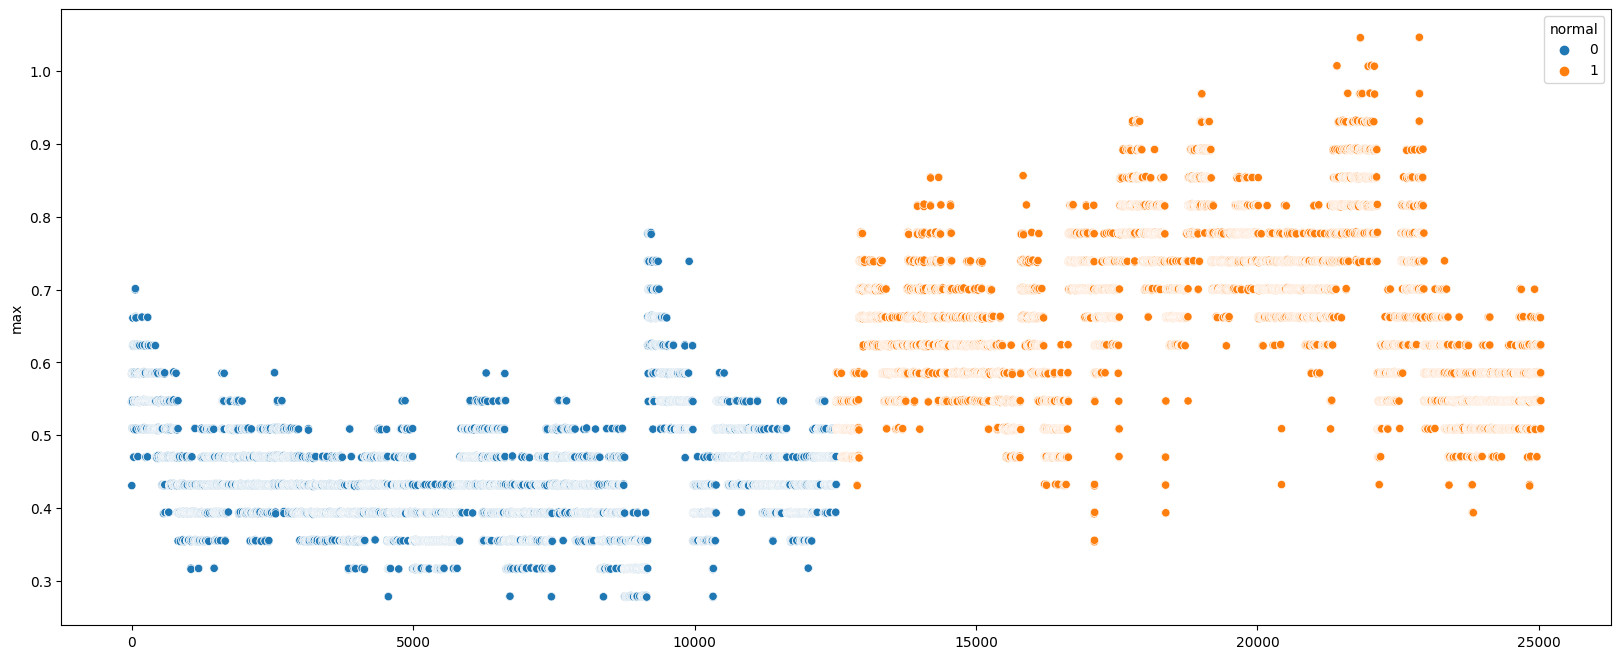

In [ ]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df_train ,x=df_train.index, y='max', hue='normal')
plt.show()

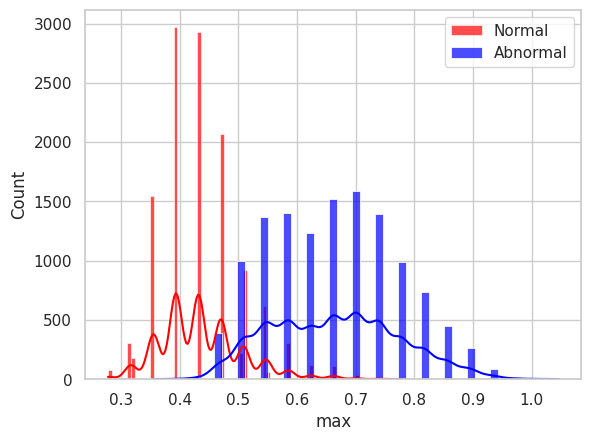

In [ ]:
# 'max' 변수에 대한 히스토그램
sns.histplot(df_train['max'].loc[df_train['normal'] == 0], kde=True, color='red', label='Normal', alpha=0.7)
sns.histplot(df_train['max'].loc[df_train['normal'] == 1], kde=True, color='blue', label='Abnormal', alpha=0.7)
sns.set(style='whitegrid')
plt.legend()
plt.show()

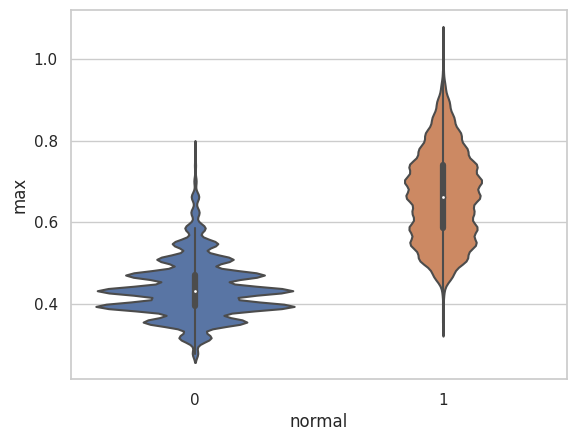

In [ ]:
# 'max' 변수에 대한 히스토그램
sns.violinplot(x=df_train['normal'] ,y=df_train['max'], kde=True, alpha=0.7)
sns.set(style='whitegrid')
plt.show()

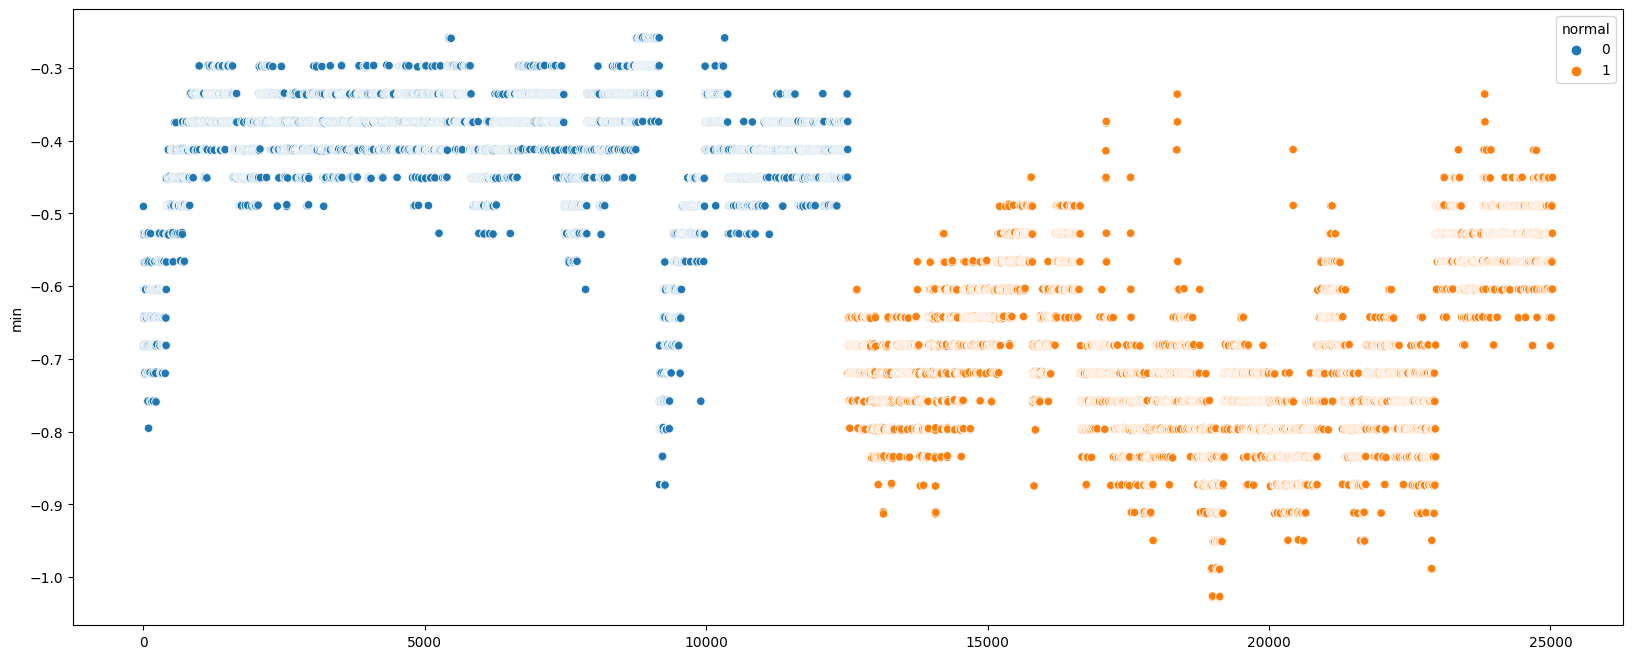

In [ ]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df_train ,x=df_train.index, y='min', hue='normal')
plt.show()

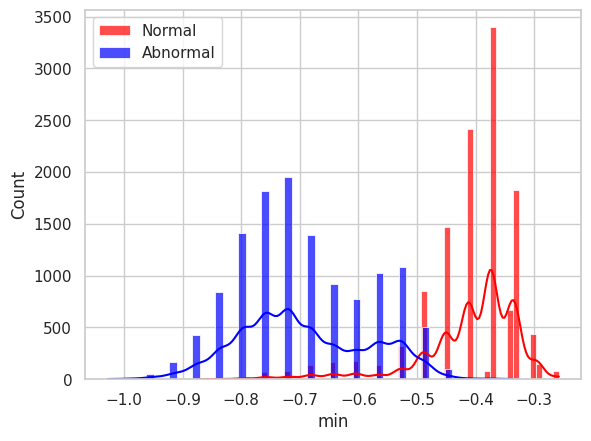

In [ ]:
# 'min' 변수에 대한 히스토그램
sns.histplot(df_train['min'].loc[df_train['normal'] == 0], kde=True, color='red', label='Normal', alpha=0.7)
sns.histplot(df_train['min'].loc[df_train['normal'] == 1], kde=True, color='blue', label='Abnormal', alpha=0.7)
sns.set(style='whitegrid')
plt.legend()
plt.show()

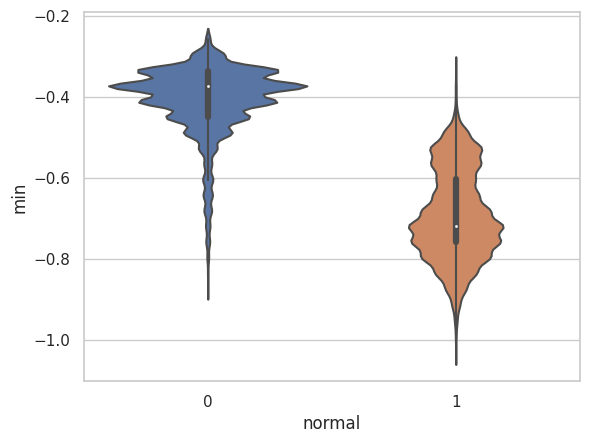

In [ ]:
# 'min' 변수에 대한 히스토그램
sns.violinplot(x=df_train['normal'] ,y=df_train['min'], kde=True, alpha=0.7)
sns.set(style='whitegrid')
plt.show()

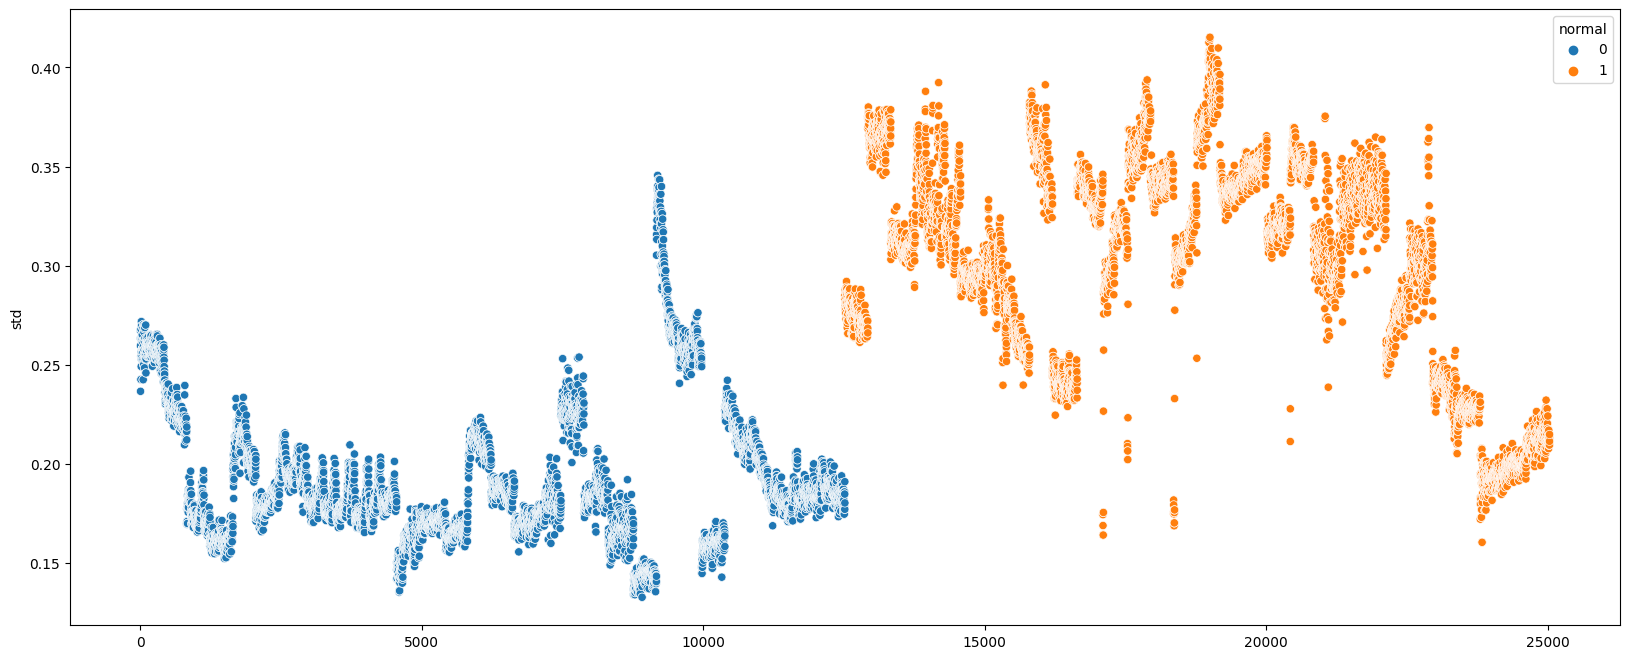

In [ ]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df_train ,x=df_train.index, y='std', hue='normal')
plt.show()

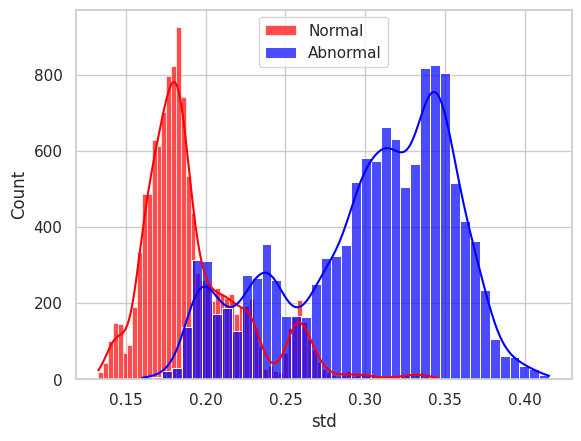

In [ ]:
# 'std' 변수에 대한 히스토그램
sns.histplot(df_train['std'].loc[df_train['normal'] == 0], kde=True, color='red', label='Normal', alpha=0.7)
sns.histplot(df_train['std'].loc[df_train['normal'] == 1], kde=True, color='blue', label='Abnormal', alpha=0.7)
sns.set(style='whitegrid')
plt.legend()
plt.show()

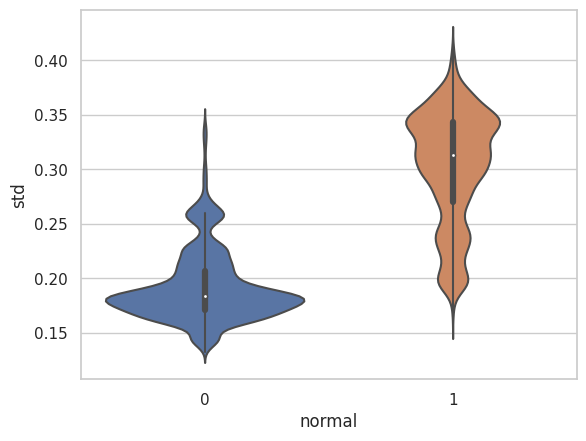

In [ ]:
# 'std' 변수에 대한 히스토그램
sns.violinplot(x=df_train['normal'] ,y=df_train['std'], kde=True, alpha=0.7)
sns.set(style='whitegrid')
plt.show()

In [ ]:
df_train.loc[df_train['normal'] == 0].describe() # 정상

,mean,max,min,std,kurt,skew,abs_mean,abs_std,normal
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.0
mean,-2.626014e-08,0.436542,-0.408716,0.192378,-0.866317,0.056618,0.162630,0.101898,0.0
std,1.924148e-03,0.071181,0.085928,0.032964,0.195323,0.089749,0.027934,0.018406,0.0
min,-8.246445e-03,0.277330,-0.873940,0.132847,-1.480508,-0.407247,0.111171,0.066334,0.0
25%,-1.236797e-03,0.393190,-0.450580,0.171232,-1.002570,0.001443,0.145574,0.089659,0.0
50%,1.562500e-07,0.431610,-0.374940,0.183436,-0.904729,0.058617,0.155002,0.096802,0.0
75%,1.236768e-03,0.470410,-0.337010,0.206540,-0.762456,0.110976,0.174812,0.109917,0.0
max,8.058711e-03,0.778360,-0.257990,0.345531,0.184198,0.500364,0.288503,0.191039,0.0


In [ ]:
df_train.loc[df_train['normal'] == 1].describe() # 비정상

,mean,max,min,std,kurt,skew,abs_mean,abs_std,normal
count,1.252000e+04,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.0
mean,-5.678415e-09,0.663851,-0.692515,0.302486,-0.582200,-0.054185,0.248369,0.171098,1.0
std,2.514963e-03,0.109653,0.110785,0.052040,0.332914,0.187647,0.044933,0.029396,0.0
min,-9.895352e-03,0.353610,-1.027590,0.160554,-1.532141,-0.704956,0.123907,0.091444,1.0
25%,-1.573867e-03,0.584800,-0.758910,0.270220,-0.776814,-0.139934,0.220091,0.150032,1.0
50%,-3.906250e-08,0.662170,-0.719140,0.313102,-0.593094,-0.040842,0.256863,0.174802,1.0
75%,1.611523e-03,0.739010,-0.604560,0.343110,-0.390019,0.075221,0.280220,0.194707,1.0
max,1.105734e-02,1.046510,-0.335280,0.415156,0.669436,0.588684,0.356307,0.245741,1.0


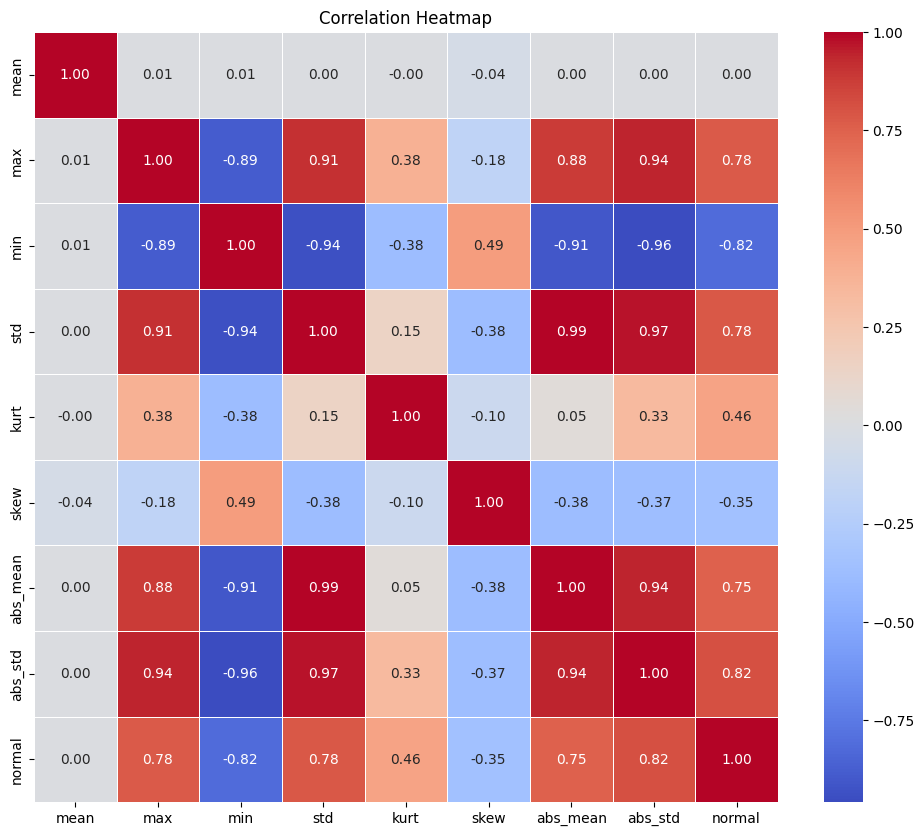

In [ ]:
# 데이터프레임의 상관관계 행렬 계산
correlation_matrix = df_train.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df_train['normal'].value_counts()

1    12520
0    12516
Name: normal, dtype: int64

# 기본 랜덤포레스트

In [ ]:
X_train = df_train.drop('normal', axis = 1)
y_train = df_train['normal']
X_test = df_test.drop('normal', axis = 1)
y_test = df_test['normal']

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (25036, 8)
y_train:  (25036,)
X_test:  (8564, 8)
y_test:  (8564,)


AUC: 0.8674
정확도: 0.7948
F1 스코어: 0.7943


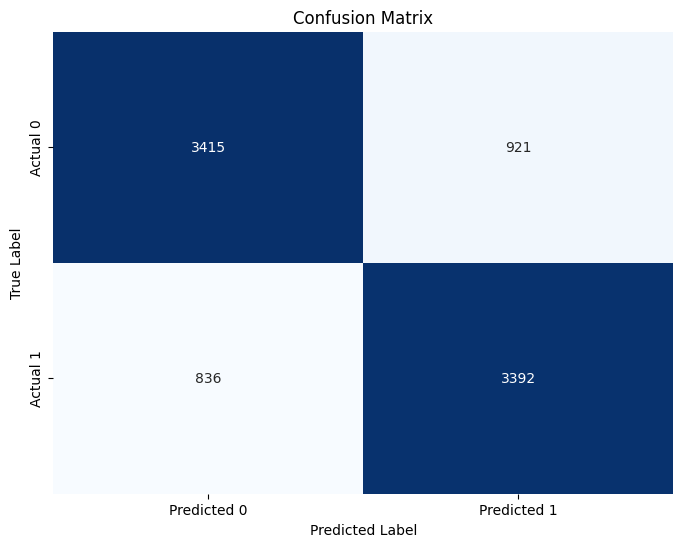

In [ ]:
# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# AUC 계산
auc_score = roc_auc_score(y_test, y_pred_proba)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

min: 0.28149924295356726
abs_std: 0.19614591785020852
max: 0.13256426658093703
std: 0.1300225943057652
abs_mean: 0.11067826318837459
kurt: 0.10417659870326544
skew: 0.03870463403742464
mean: 0.006208482380457369


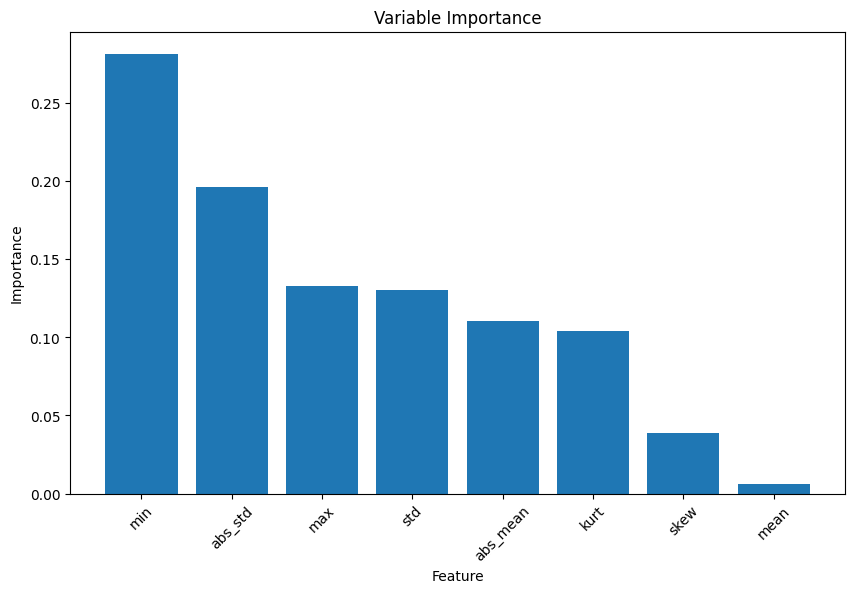

In [ ]:
# 변수 중요도 가져오기
importances = model.feature_importances_

# 중요도를 기준으로 내림차순으로 정렬된 인덱스
indices = np.argsort(importances)[::-1]

# 변수 이름과 중요도 출력
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Variable Importance")
plt.show()

# min, max 하나로 묶기

In [ ]:
df_train['minmax'] = df_train['min'].abs() + df_train['max'].abs()
df_test['minmax'] = df_test['min'].abs() + df_test['max'].abs()

df_train = df_train.drop(['min','max'], axis=1)
df_test = df_test.drop(['min','max'], axis=1)

In [ ]:
X_train = df_train.drop('normal', axis = 1)
y_train = df_train['normal']
X_test = df_test.drop('normal', axis = 1)
y_test = df_test['normal']

AUC: 0.8706
정확도: 0.7913
F1 스코어: 0.7911


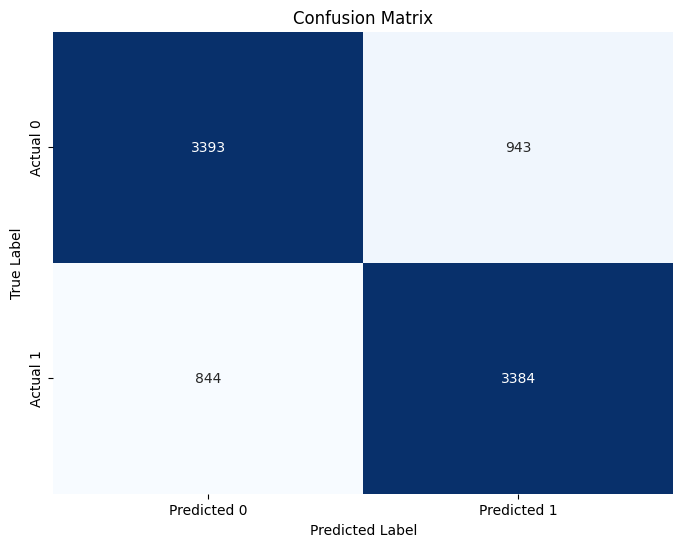

In [ ]:
# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# AUC 계산
auc_score = roc_auc_score(y_test, y_pred_proba)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

minmax: 0.2959445534559564
abs_std: 0.2596966765955122
std: 0.19126656387308297
abs_mean: 0.11091597672867472
kurt: 0.10296416554760258
skew: 0.03197663045346676
mean: 0.007235433345704486


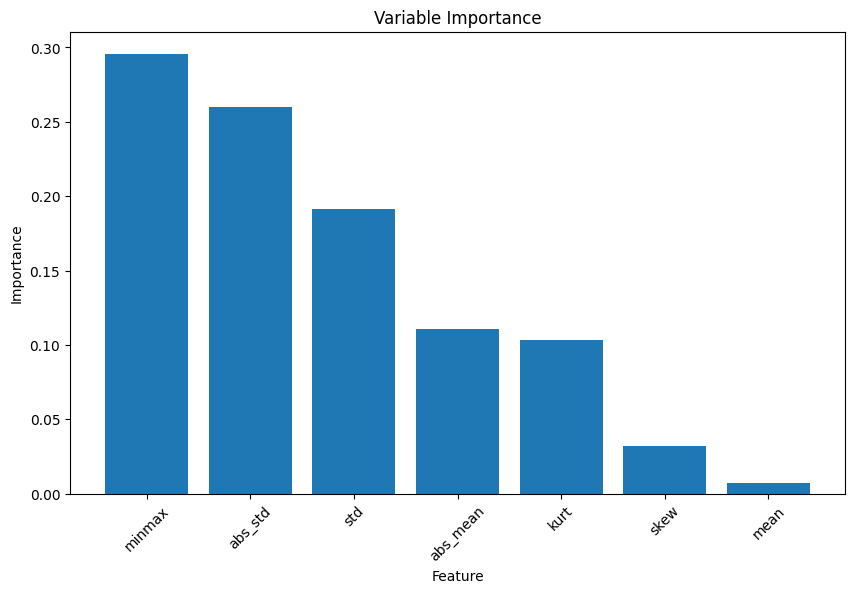

In [ ]:
# 변수 중요도 가져오기
importances = model.feature_importances_

# 중요도를 기준으로 내림차순으로 정렬된 인덱스
indices = np.argsort(importances)[::-1]

# 변수 이름과 중요도 출력
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Variable Importance")
plt.show()

# minmax 쓰고 skew빼고 돌려보기

In [ ]:
df_train = df_train.drop('skew', axis=1)
df_test = df_test.drop('skew', axis=1)

In [ ]:
X_train = df_train.drop('normal', axis = 1)
y_train = df_train['normal']
X_test = df_test.drop('normal', axis = 1)
y_test = df_test['normal']

AUC: 0.8634
정확도: 0.7960
F1 스코어: 0.7949


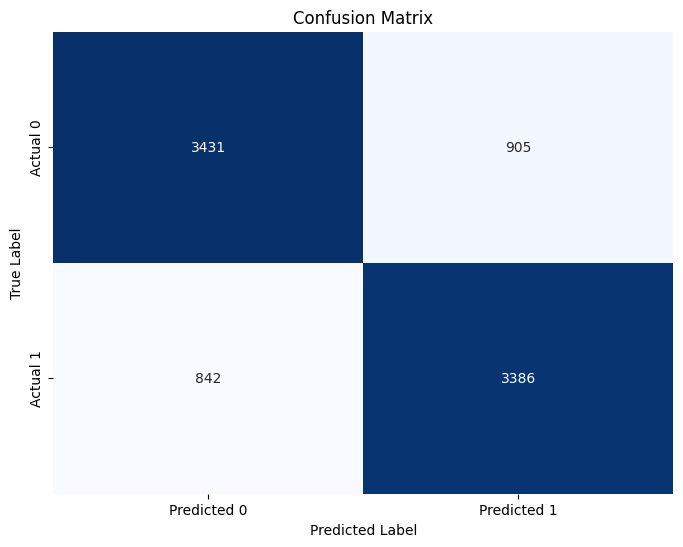

In [ ]:
# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# AUC 계산
auc_score = roc_auc_score(y_test, y_pred_proba)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

minmax: 0.35657712040074246
abs_std: 0.2543000387478738
std: 0.1524539372101022
abs_mean: 0.12683429173947322
kurt: 0.09971302205205128
mean: 0.01012158984975708


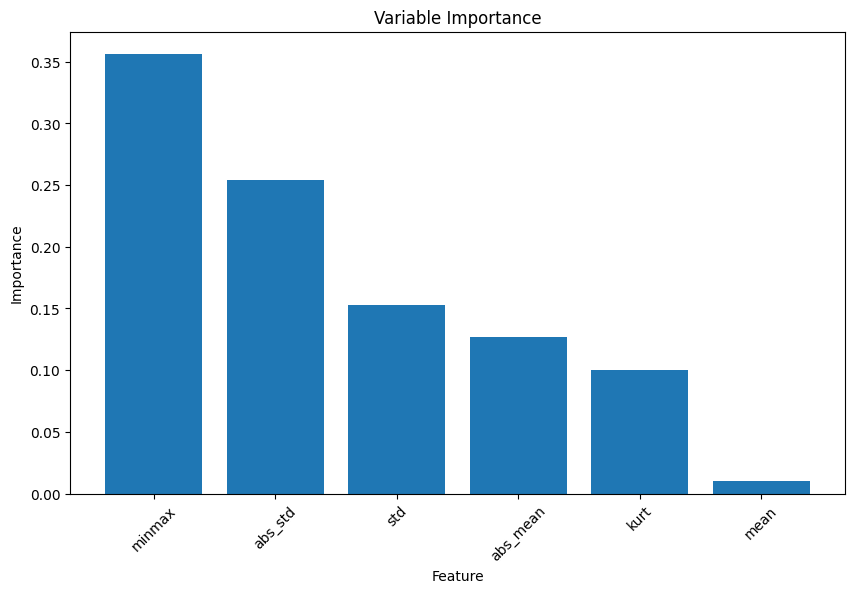

In [ ]:
# 변수 중요도 가져오기
importances = model.feature_importances_

# 중요도를 기준으로 내림차순으로 정렬된 인덱스
indices = np.argsort(importances)[::-1]

# 변수 이름과 중요도 출력
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Variable Importance")
plt.show()

# 변수 3개만 써보기

In [ ]:
df_train = df_train[['minmax','abs_std','std','normal']]
df_test = df_test[['minmax','abs_std','std','normal']]

In [ ]:
X_train = df_train.drop('normal', axis = 1)
y_train = df_train['normal']
X_test = df_test.drop('normal', axis = 1)
y_test = df_test['normal']

AUC: 0.8409
정확도: 0.7683
F1 스코어: 0.7638


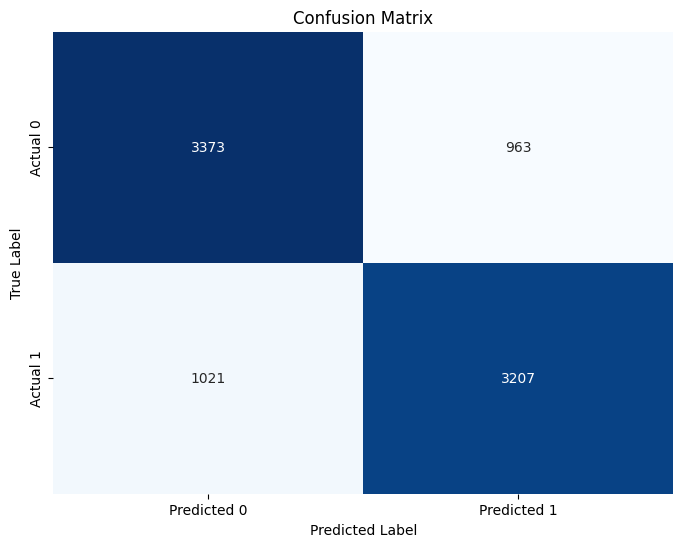

In [ ]:
# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# AUC 계산
auc_score = roc_auc_score(y_test, y_pred_proba)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

minmax: 0.3715477624648299
abs_std: 0.37012802224029306
std: 0.258324215294877


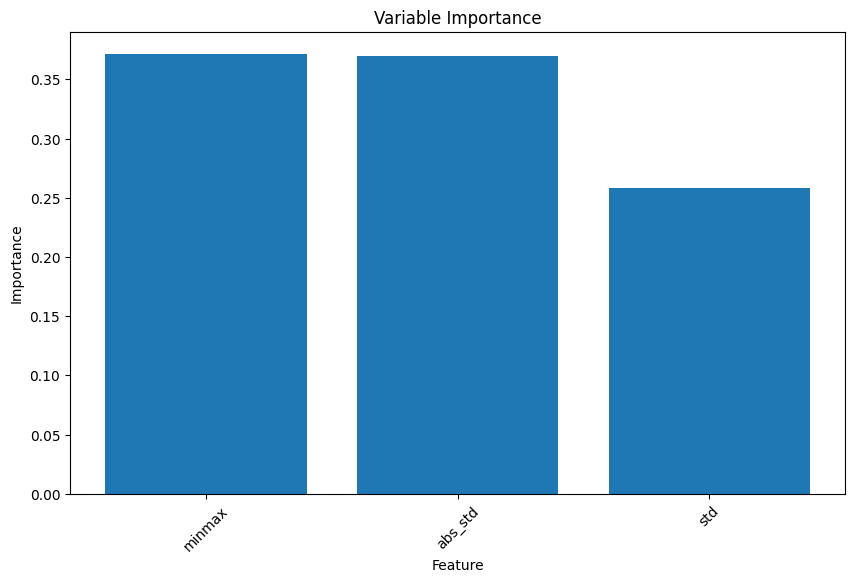

In [ ]:
# 변수 중요도 가져오기
importances = model.feature_importances_

# 중요도를 기준으로 내림차순으로 정렬된 인덱스
indices = np.argsort(importances)[::-1]

# 변수 이름과 중요도 출력
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Variable Importance")
plt.show()

# 변수에 로그 스케일링 하기(효과 있음)

- max, std, abs_mean, abs_std에 적용
- 왜 로그 적용했는데 이상한지 모르겠음(다음에 다시 해결)

In [ ]:
# 로그 스케일링을 적용할 변수 선택
log_columns = ['max', 'std', 'abs_mean', 'abs_std']

# 선택된 변수에 로그 스케일링 적용
df_train[log_columns] = np.log1p(df_train[log_columns])

df_train

,mean,max,min,std,kurt,skew,abs_mean,abs_std,normal
0,0.002062,0.435580,-0.64399,0.230835,-0.545851,-0.217028,0.192944,0.137920,0
1,-0.003936,0.358171,-0.49046,0.212429,-1.068667,-0.126347,0.183645,0.116171,0
2,0.001462,0.460105,-0.68237,0.236743,-0.754087,-0.102669,0.202161,0.134961,0
3,0.000412,0.435580,-0.64399,0.233785,-0.605474,-0.214701,0.195017,0.140417,0
4,0.001275,0.459985,-0.68256,0.236743,-0.754079,-0.102668,0.202158,0.134965,0
...,...,...,...,...,...,...,...,...,...
25031,-0.001087,0.410738,-0.52839,0.190279,-0.322613,0.182527,0.154978,0.117893,1
25032,0.000262,0.461051,-0.52734,0.193246,-0.164629,-0.087018,0.156157,0.121550,1
25033,-0.000037,0.411434,-0.52734,0.190280,-0.322623,0.182525,0.154964,0.117908,1
25034,-0.000638,0.484966,-0.60411,0.191842,0.420589,0.144125,0.151956,0.124631,1


In [ ]:
X_train = df_train.drop('normal', axis = 1)
y_train = df_train['normal']
X_test = df_test.drop('normal', axis = 1)
y_test = df_test['normal']

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (25036, 8)
y_train:  (25036,)
X_test:  (8564, 8)
y_test:  (8564,)


AUC: 0.8775
정확도: 0.7673
F1 스코어: 0.7963


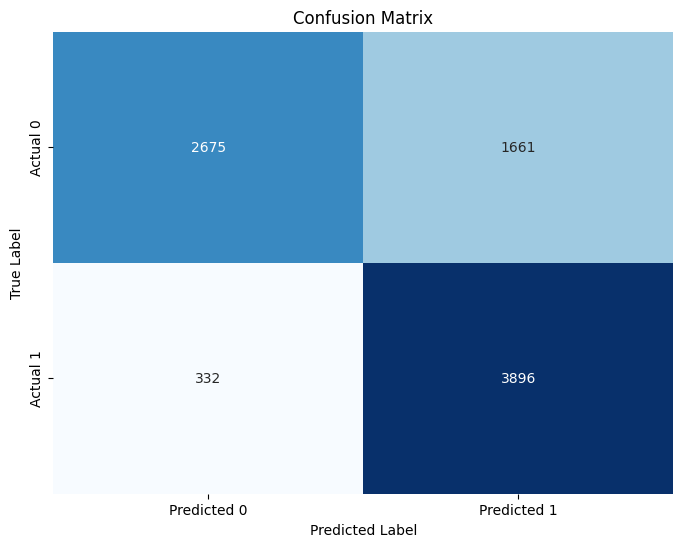

In [ ]:
# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# AUC 계산
auc_score = roc_auc_score(y_test, y_pred_proba)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

min: 0.24701407920919302
abs_std: 0.2263001135317465
max: 0.1521071984272807
std: 0.1257788077933655
abs_mean: 0.10939325834284747
kurt: 0.09838374855460214
skew: 0.03488294231549602
mean: 0.006139851825468755


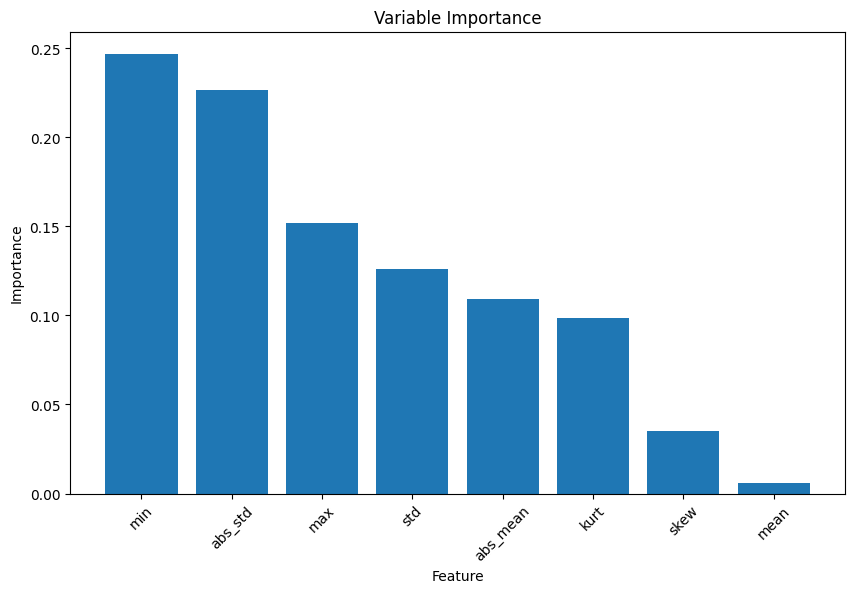

In [ ]:
# 변수 중요도 가져오기
importances = model.feature_importances_

# 중요도를 기준으로 내림차순으로 정렬된 인덱스
indices = np.argsort(importances)[::-1]

# 변수 이름과 중요도 출력
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Variable Importance")
plt.show()

# fft 데이터 활용

In [ ]:
df_fft_train = pd.read_csv('/content/train_0_fft.csv')
df_fft_test = pd.read_csv('/content/test_0_fft.csv')

In [ ]:
X_train = df_fft_train.drop('target', axis = 1)
y_train = df_fft_train['target']
X_test = df_fft_test.drop('target', axis = 1)
y_test = df_fft_test['target']

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (25036, 129)
y_train:  (25036,)
X_test:  (8564, 129)
y_test:  (8564,)


AUC: 0.7447
정확도: 0.7473
F1 스코어: 0.6768


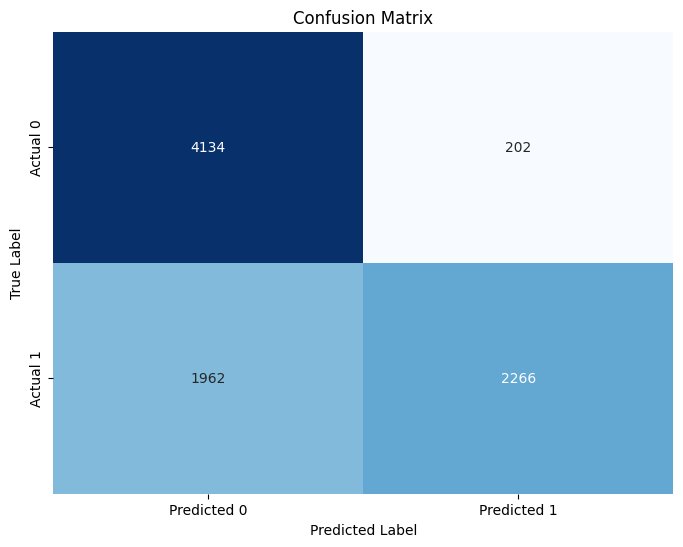

In [ ]:
# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)


from sklearn.preprocessing import Binarizer

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Binarizer 객체 생성
binarizer = Binarizer(threshold = 0.5)

my_binarizer = binarizer.fit_transform(y_pred_proba.reshape(-1, 1))

# AUC 계산
auc_score = roc_auc_score(y_test, my_binarizer)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
y_pred_proba

array([0.975, 0.985, 0.94 , ..., 0.1  , 0.075, 0.105])

min: 0.28149924295356726
abs_std: 0.19614591785020852
max: 0.13256426658093703
std: 0.1300225943057652
abs_mean: 0.11067826318837459
kurt: 0.10417659870326544
skew: 0.03870463403742464
mean: 0.006208482380457369


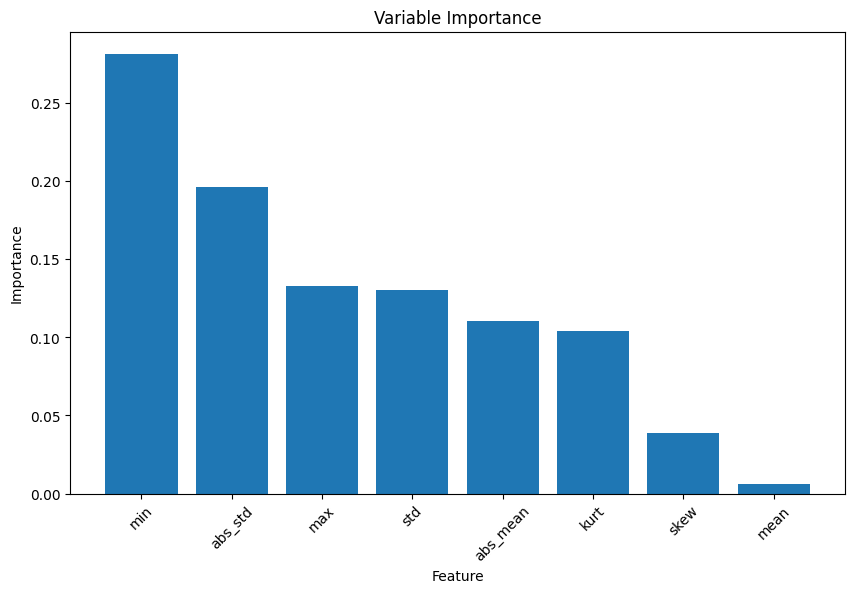

In [ ]:
# 변수 중요도 가져오기
importances = model.feature_importances_

# 중요도를 기준으로 내림차순으로 정렬된 인덱스
indices = np.argsort(importances)[::-1]

# 변수 이름과 중요도 출력
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Variable Importance")
plt.show()

# 딥러닝 모델 사용

In [ ]:
# 신경망 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(128, input_dim=129, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 128)               16640     
                                                                 
 batch_normalization_30 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_31 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_49 (Dense)            (None, 32)              

In [ ]:
# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
137/137 [==============================] - 4s 10ms/step - loss: 0.1882 - auc: 0.9895 - accuracy: 0.9322 - val_loss: 0.3242 - val_auc: 0.0000e+00 - val_accuracy: 0.8779
Epoch 2/50
137/137 [==============================] - 1s 9ms/step - loss: 0.0197 - auc: 1.0000 - accuracy: 0.9979 - val_loss: 0.0966 - val_auc: 0.0000e+00 - val_accuracy: 0.9653
Epoch 3/50
137/137 [==============================] - 1s 8ms/step - loss: 0.0081 - auc: 1.0000 - accuracy: 0.9993 - val_loss: 0.0852 - val_auc: 0.0000e+00 - val_accuracy: 0.9672
Epoch 4/50
137/137 [==============================] - 1s 8ms/step - loss: 0.0050 - auc: 1.0000 - accuracy: 0.9997 - val_loss: 0.0650 - val_auc: 0.0000e+00 - val_accuracy: 0.9728
Epoch 5/50
137/137 [==============================] - 1s 9ms/step - loss: 0.0030 - auc: 1.0000 - accuracy: 0.9998 - val_loss: 0.0546 - val_auc: 0.0000e+00 - val_accuracy: 0.9800
Epoch 6/50
137/137 [==============================] - 1s 9ms/step - loss: 0.0021 - auc: 1.0000 - accuracy: 0.

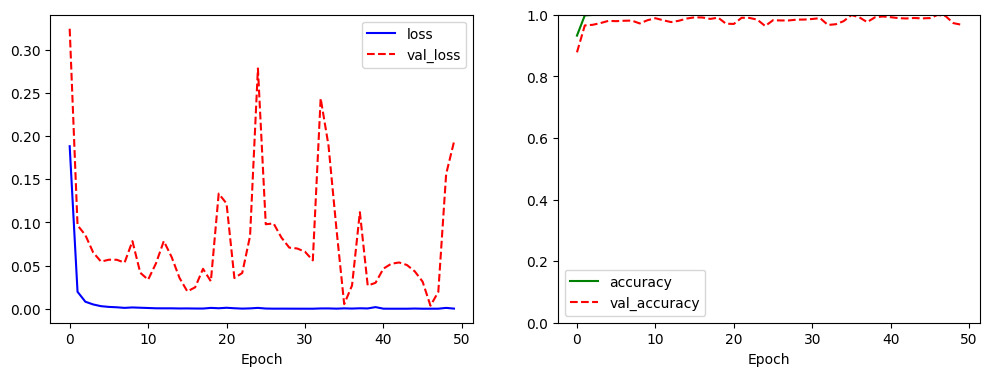

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

268/268 [==============================] - 1s 3ms/step - loss: 0.7829 - auc: 0.9131 - accuracy: 0.8521
loss and accuracy :  [0.7828897833824158, 0.9131090641021729, 0.8520551323890686]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

268/268 [==============================] - 1s 2ms/step


268/268 [==============================] - 1s 3ms/step - loss: 0.7829 - auc: 0.9131 - accuracy: 0.8521
loss and accuracy :  [0.7828897833824158, 0.9131090641021729, 0.8520551323890686]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4336
           1       0.85      0.84      0.85      4228

    accuracy                           0.85      8564
   macro avg       0.85      0.85      0.85      8564
weighted avg       0.85      0.85      0.85      8564



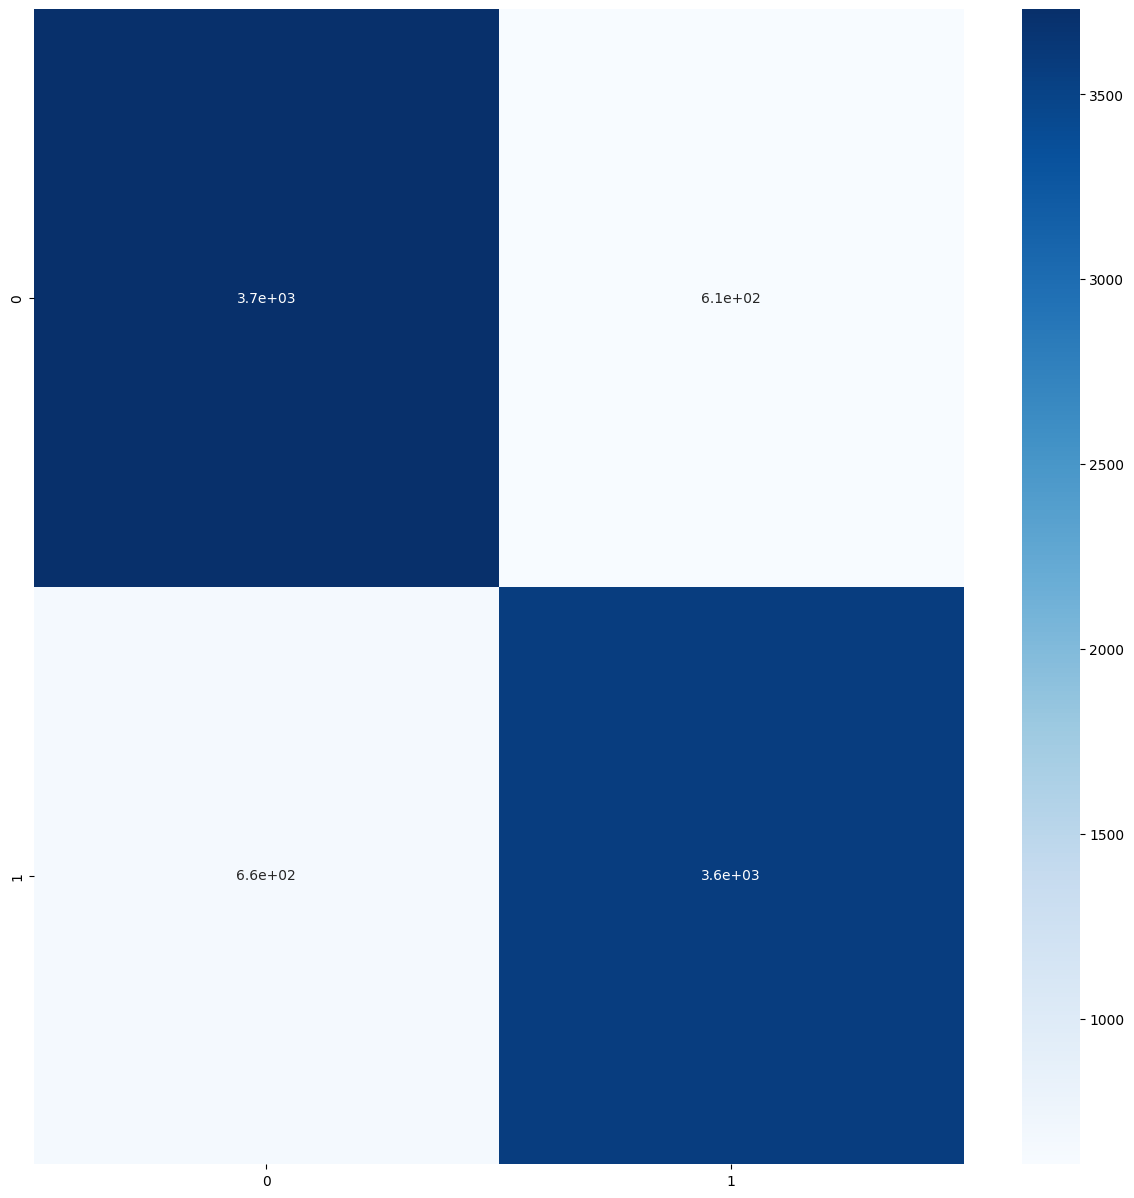

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

# classification_report 함수에서 반환되는 값은 튜플 하나이므로 하나의 변수에 받음
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

plt.figure(figsize=(15, 15))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

AUC: 0.8520
정확도: 0.8521
F1 스코어: 0.8492


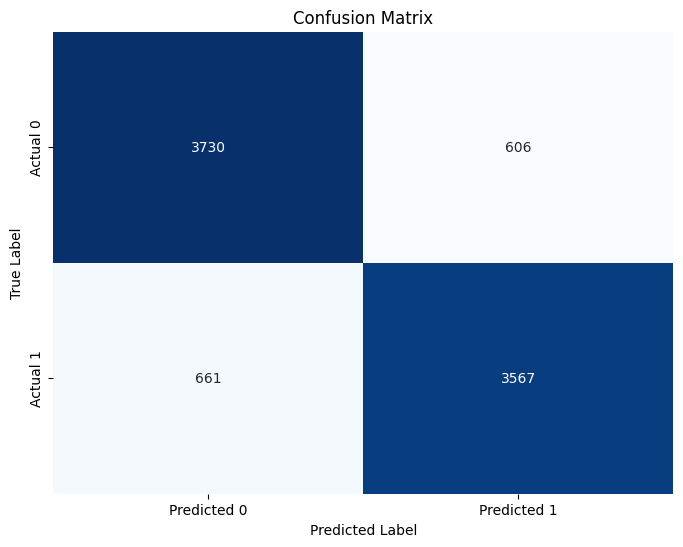

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# fft 데이터 시각화

In [ ]:
df_fft_train

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,target
0,0.48937,0.754067,0.721972,1.105029,0.537482,1.813463,1.504164,1.096414,1.734573,0.883342,...,1.627999,1.891413,2.504647,3.790013,0.740094,1.527207,1.174129,0.719002,0.49901,1
1,0.70052,0.631650,0.766651,0.966008,1.400714,1.154523,0.788774,1.101803,1.428216,1.102083,...,2.967666,2.339524,3.755707,3.427759,1.249829,1.355175,0.933543,0.892415,1.22814,1
2,0.02881,0.527805,0.288918,0.623191,0.405082,0.695788,0.631081,0.231085,0.270639,0.862010,...,2.201313,1.401933,2.393469,3.829343,1.208291,0.262299,0.571871,0.450383,0.49905,1
3,0.18224,0.299455,0.354458,0.878198,0.470459,0.057097,0.735454,0.665636,0.900001,0.840836,...,0.618867,0.581512,2.934494,2.770484,0.995067,0.597483,0.244649,1.641157,0.49904,1
4,0.27809,0.527785,0.288933,0.623152,0.405060,0.695782,0.631082,0.231038,0.270674,0.861996,...,2.201311,1.401940,2.393483,3.829354,1.208223,0.262262,0.571884,0.450334,0.49899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25031,0.34537,0.748986,0.709191,1.130966,0.591477,0.877748,0.566156,1.542997,1.850463,1.358728,...,0.296137,0.898058,0.519815,0.896815,0.311740,0.189004,1.133156,0.614835,0.92113,0
25032,0.01901,0.373238,0.106775,0.835202,0.636474,0.474898,0.300700,0.826423,1.295603,1.037176,...,0.675455,1.187060,0.445218,0.750032,0.649047,0.654596,1.550190,0.470010,0.23033,0
25033,0.78672,0.748952,0.709291,1.130966,0.591530,0.877762,0.566130,1.543020,1.850425,1.358638,...,0.296316,0.897958,0.519776,0.896798,0.311695,0.189021,1.133149,0.614772,0.92114,0
25034,0.24935,0.304071,0.231421,0.850941,0.872591,1.328186,1.115613,0.742598,1.430128,1.344100,...,0.605557,0.515168,0.928299,0.403858,0.993405,0.265181,0.870892,0.656376,0.07673,0


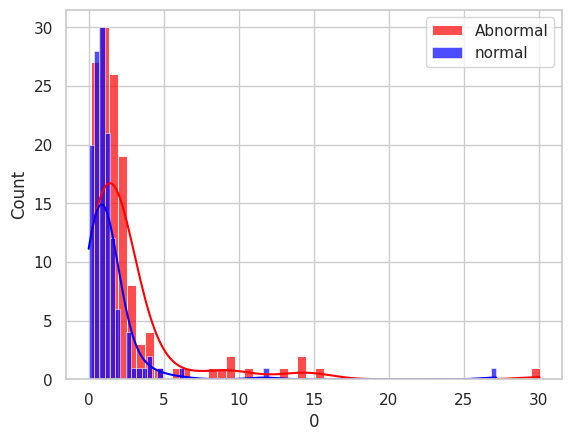

In [ ]:
# 히스토그램
sns.histplot(df_fft_train.iloc[0], kde=True, color='red', label='Abnormal', alpha=0.7)
sns.histplot(df_fft_train.iloc[25035], kde=True, color='blue', label='normal', alpha=0.7)
sns.set(style='whitegrid')
plt.legend()
plt.show()

In [ ]:
scaler = StandardScaler()
df_fft_train_ss = scaler.fit_transform(df_fft_train)

In [ ]:
df_fft_train_ss = pd.DataFrame(df_fft_train_ss)
df_fft_train_ss

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.124991,0.722728,0.474441,1.303964,-0.318701,2.561314,1.610379,0.557930,1.623526,-0.162494,...,0.064371,0.255550,0.157024,1.256218,-0.455403,0.193119,0.119224,-0.367501,-0.410003,0.99984
1,0.707556,0.376934,0.596924,0.937710,1.836855,1.021497,0.034037,0.569048,1.039388,0.221947,...,0.830936,0.491586,0.573027,1.040414,-0.128576,0.073327,-0.166687,-0.135503,0.432233,0.99984
2,-1.145699,0.083603,-0.712722,0.034551,-0.649314,-0.050480,-0.313434,-1.227273,-1.167786,-0.199986,...,0.392425,-0.002276,0.120056,1.279648,-0.155210,-0.687685,-0.596496,-0.726868,-0.409957,0.99984
3,-0.722384,-0.561421,-0.533053,0.706373,-0.486062,-1.542977,-0.083452,-0.330780,0.032230,-0.237200,...,-0.513060,-0.434420,0.299958,0.648857,-0.291922,-0.454283,-0.985366,0.866186,-0.409969,0.99984
4,-0.457933,0.083548,-0.712682,0.034451,-0.649369,-0.050492,-0.313432,-1.227369,-1.167720,-0.200010,...,0.392424,-0.002272,0.120060,1.279655,-0.155253,-0.687711,-0.596481,-0.726932,-0.410026,0.99984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25031,-0.272306,0.708376,0.439404,1.372294,-0.183871,0.374726,-0.456495,1.479245,1.844494,0.673004,...,-0.697727,-0.267685,-0.502972,-0.467338,-0.730051,-0.738723,0.070533,-0.506858,0.077598,-1.00016
25032,-1.172737,-0.353005,-1.212044,0.593098,-0.071510,-0.566656,-1.041419,0.000929,0.786531,0.107871,...,-0.480680,-0.115457,-0.527777,-0.554781,-0.513780,-0.414513,0.566135,-0.700610,-0.720362,-1.00016
25033,0.945383,0.708279,0.439679,1.372293,-0.183738,0.374759,-0.456551,1.479294,1.844422,0.672845,...,-0.697625,-0.267737,-0.502985,-0.467348,-0.730080,-0.738711,0.070524,-0.506942,0.077610,-1.00016
25034,-0.537226,-0.548381,-0.870343,0.634564,0.518093,1.427313,0.754218,-0.172004,1.043033,0.647294,...,-0.520675,-0.469366,-0.367143,-0.761006,-0.292988,-0.685678,-0.241141,-0.451283,-0.897789,-1.00016


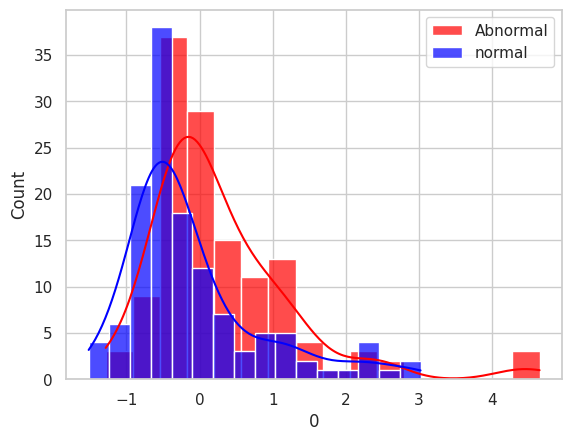

In [ ]:
# 히스토그램
sns.histplot(df_fft_train_ss.iloc[0], kde=True, color='red', label='Abnormal', alpha=0.7)
sns.histplot(df_fft_train_ss.iloc[25035], kde=True, color='blue', label='normal', alpha=0.7)
sns.set(style='whitegrid')
plt.legend()
plt.show()

In [ ]:
df_fft_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,target
count,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,...,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.000000,25036.00000
mean,0.444067,0.498208,0.548905,0.610076,0.665112,0.717390,0.773327,0.825972,0.883098,0.975799,...,1.515502,1.406254,2.032421,1.681299,1.450363,1.249872,1.073805,0.993701,0.853953,0.50008
std,0.362456,0.354025,0.364788,0.379584,0.400477,0.427943,0.453838,0.484733,0.524471,0.568997,...,1.747659,1.898526,3.007398,1.678654,1.559679,1.436112,0.841487,0.747494,0.865725,0.50001
min,0.000000,0.004084,0.005502,0.002181,0.005407,0.008801,0.001475,0.005984,0.008773,0.005419,...,0.003652,0.009030,0.005535,0.008642,0.011412,0.004810,0.004523,0.009040,0.000000,0.00000
25%,0.163180,0.233322,0.280092,0.331179,0.366456,0.397125,0.438037,0.467880,0.500035,0.551929,...,0.556060,0.548865,0.599491,0.654876,0.614333,0.546518,0.547294,0.517844,0.307040,0.00000
50%,0.355050,0.409313,0.468232,0.532443,0.591803,0.644030,0.696288,0.743088,0.795332,0.884585,...,0.925041,0.899878,1.007396,1.136969,1.030817,0.899536,0.875773,0.831650,0.652450,1.00000
75%,0.633253,0.675806,0.726666,0.813640,0.883677,0.960133,1.021898,1.090445,1.162694,1.295895,...,1.616633,1.484157,1.788012,2.004843,1.685455,1.410477,1.335502,1.243840,1.151360,1.00000
max,2.830680,2.645197,2.653375,2.957518,2.932351,3.448853,3.932082,3.698093,4.497033,6.109452,...,12.230812,20.961959,22.308223,17.088548,12.513902,13.518798,9.199044,7.352033,9.710730,1.00000


In [ ]:
df_fft_train_ss.describe()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
count,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,...,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04,2.503600e+04
mean,-3.746271e-17,-2.383991e-16,-5.619407e-17,3.405701e-17,8.798061e-17,3.644100e-16,1.044415e-16,-1.521213e-16,-2.156944e-17,9.535963e-17,...,1.566622e-16,5.903215e-17,-6.243785e-17,1.362280e-17,-4.654458e-17,6.016738e-17,-1.816374e-17,-1.260109e-16,-1.146586e-16,2.951607e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,...,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.225186e+00,-1.395761e+00,-1.489673e+00,-1.601508e+00,-1.647332e+00,-1.655835e+00,-1.700753e+00,-1.691663e+00,-1.667092e+00,-1.705455e+00,...,-8.650888e-01,-7.359664e-01,-6.739801e-01,-9.964472e-01,-9.226122e-01,-8.669843e-01,-1.270731e+00,-1.317310e+00,-9.864222e-01,-1.000160e+00
25%,-7.749703e-01,-7.482278e-01,-7.369176e-01,-7.347580e-01,-7.457654e-01,-7.483968e-01,-7.388022e-01,-7.387567e-01,-7.303929e-01,-7.449560e-01,...,-5.489978e-01,-4.516169e-01,-4.764777e-01,-6.114683e-01,-5.360375e-01,-4.897724e-01,-6.257041e-01,-6.366164e-01,-6.317527e-01,-1.000160e+00
50%,-2.455991e-01,-2.511047e-01,-2.211557e-01,-2.045259e-01,-1.830565e-01,-1.714273e-01,-1.697532e-01,-1.709925e-01,-1.673439e-01,-1.603100e-01,...,-3.378650e-01,-2.667258e-01,-3.408413e-01,-3.242719e-01,-2.690005e-01,-2.439521e-01,-2.353401e-01,-2.167962e-01,-2.327610e-01,9.998402e-01
75%,5.219644e-01,5.016636e-01,4.873083e-01,5.362923e-01,5.457744e-01,5.672446e-01,5.477196e-01,5.456160e-01,5.331115e-01,5.625731e-01,...,5.786793e-02,4.103405e-02,-8.127094e-02,1.927442e-01,1.507340e-01,1.118358e-01,3.109994e-01,3.346444e-01,3.435424e-01,9.998402e-01
max,6.584689e+00,6.064631e+00,5.769140e+00,6.184376e+00,5.661465e+00,6.382906e+00,6.960229e+00,5.925281e+00,6.890761e+00,9.022465e+00,...,6.131359e+00,1.030067e+01,6.742109e+00,9.178518e+00,7.093612e+00,8.543327e+00,9.656004e+00,8.506371e+00,1.023068e+01,9.998402e-01


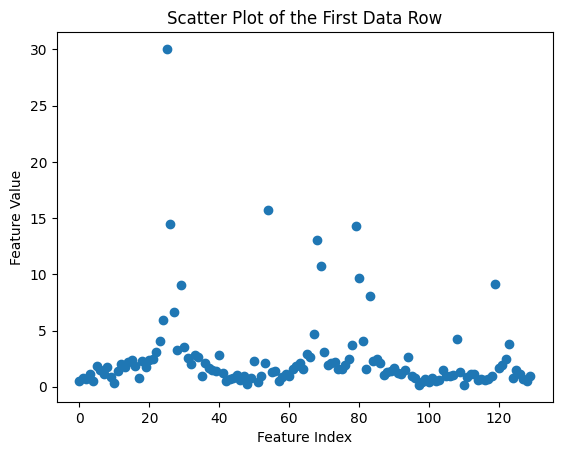

In [ ]:
first_row = df_fft_train.iloc[0]

# scatter plot 그리기
plt.scatter(range(len(first_row)), first_row)
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Scatter Plot of the First Data Row')
plt.show()

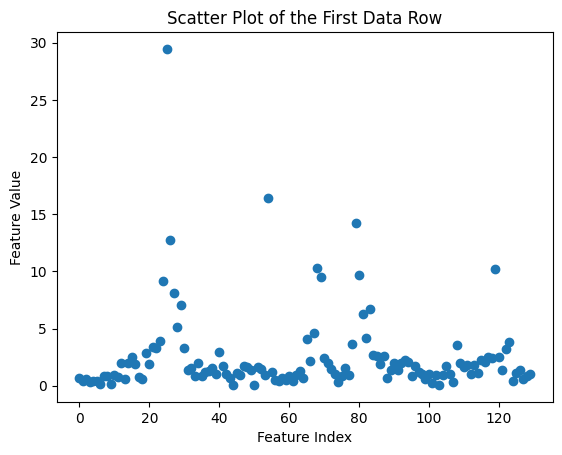

In [ ]:
first_row = df_fft_train.iloc[100]

# scatter plot 그리기
plt.scatter(range(len(first_row)), first_row)
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Scatter Plot of the First Data Row')
plt.show()

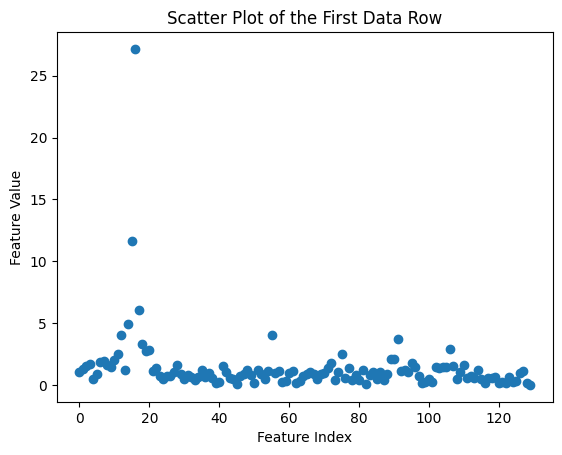

In [ ]:
first_row = df_fft_train.iloc[25035]

# scatter plot 그리기
plt.scatter(range(len(first_row)), first_row)
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Scatter Plot of the First Data Row')
plt.show()

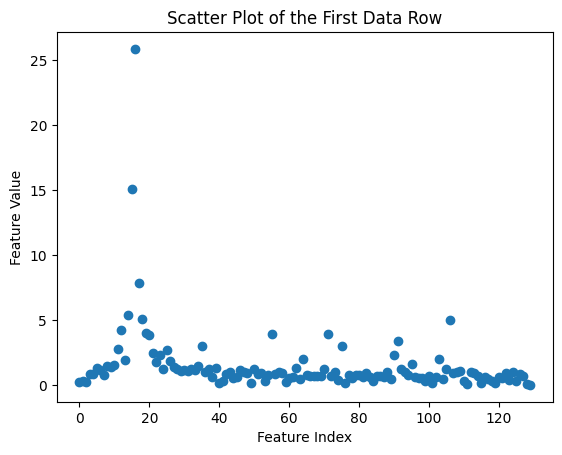

In [ ]:
first_row = df_fft_train.iloc[25034]

# scatter plot 그리기
plt.scatter(range(len(first_row)), first_row)
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Scatter Plot of the First Data Row')
plt.show()

# 딥러닝 비교 분석

In [ ]:
df_fft_train = pd.read_csv('/content/train_0_fft.csv')
df_fft_test = pd.read_csv('/content/test_0_fft.csv')

In [ ]:
X_train = df_fft_train.drop('target', axis = 1)
y_train = df_fft_train['target']
X_test = df_fft_test.drop('target', axis = 1)
y_test = df_fft_test['target']

In [ ]:
y_test

0       1
1       1
2       1
3       1
4       1
       ..
8559    0
8560    0
8561    0
8562    0
8563    0
Name: target, Length: 8564, dtype: int64

In [ ]:
y_train.value_counts()

1    12520
0    12516
Name: target, dtype: int64

In [ ]:
y_test.value_counts()

0    4336
1    4228
Name: target, dtype: int64

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (25036, 129)
y_train:  (25036,)
X_test:  (8564, 129)
y_test:  (8564,)


In [ ]:
# 신경망 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(32, input_dim=129, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 32)                4160      
                                                                 
 batch_normalization_28 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_29 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dropout_27 (Dropout)        (None, 16)              

In [ ]:
# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='mse', optimizer='adam', metrics=['AUC', 'accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
137/137 [==============================] - 3s 10ms/step - loss: 1.5388 - auc: 0.6398 - accuracy: 0.5771 - val_loss: 0.1376 - val_auc: 0.0000e+00 - val_accuracy: 0.8760
Epoch 2/50
137/137 [==============================] - 1s 10ms/step - loss: 0.5679 - auc: 0.7474 - accuracy: 0.6946 - val_loss: 0.1405 - val_auc: 0.0000e+00 - val_accuracy: 0.8460
Epoch 3/50
137/137 [==============================] - 1s 11ms/step - loss: 0.3308 - auc: 0.8235 - accuracy: 0.7654 - val_loss: 0.1172 - val_auc: 0.0000e+00 - val_accuracy: 0.8734
Epoch 4/50
137/137 [==============================] - 1s 11ms/step - loss: 0.2260 - auc: 0.8755 - accuracy: 0.8167 - val_loss: 0.0915 - val_auc: 0.0000e+00 - val_accuracy: 0.9004
Epoch 5/50
137/137 [==============================] - 1s 9ms/step - loss: 0.1568 - auc: 0.9173 - accuracy: 0.8636 - val_loss: 0.0701 - val_auc: 0.0000e+00 - val_accuracy: 0.9228
Epoch 6/50
137/137 [==============================] - 1s 10ms/step - loss: 0.1163 - auc: 0.9498 - accuracy

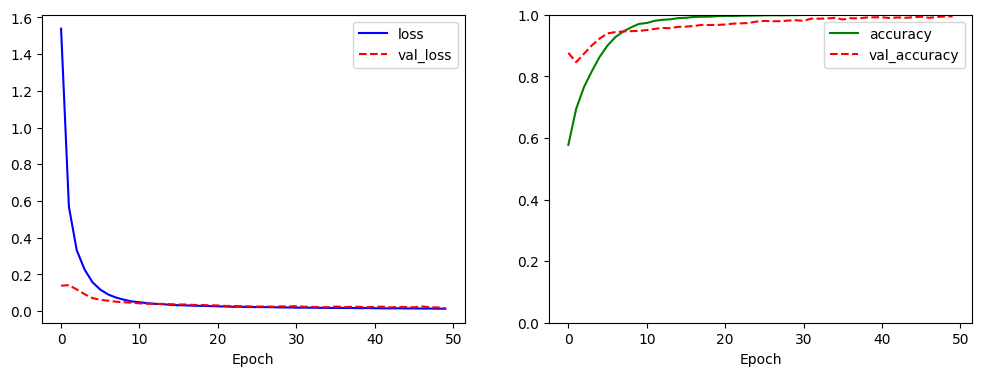

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

268/268 [==============================] - 1s 3ms/step - loss: 0.0651 - auc: 0.9908 - accuracy: 0.9367
loss and accuracy :  [0.06513018161058426, 0.9908397197723389, 0.9367117881774902]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

268/268 [==============================] - 1s 3ms/step


AUC: 0.9362
정확도: 0.9367
F1 스코어: 0.9332


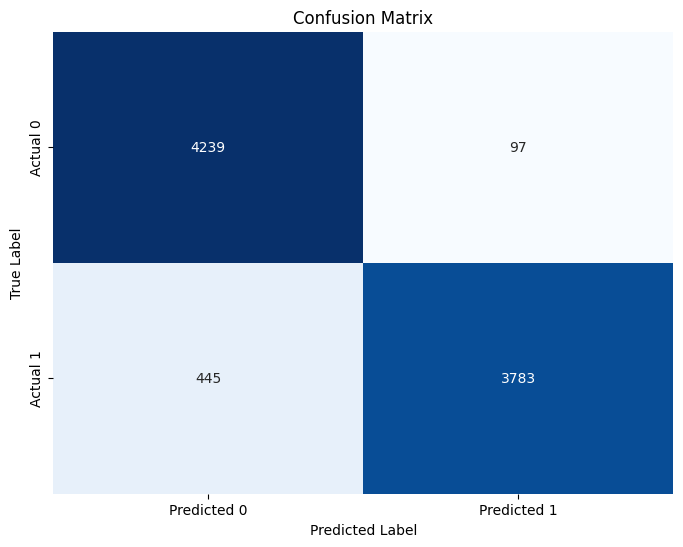

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 모델2

In [ ]:
# 신경망 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(32, input_dim=129, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 32)                4160      
                                                                 
 batch_normalization_33 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_52 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_34 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dropout_31 (Dropout)        (None, 16)              

In [ ]:
# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='mse', optimizer='adam', metrics=['AUC', 'accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
137/137 [==============================] - 3s 9ms/step - loss: 0.1040 - auc: 0.9540 - accuracy: 0.8682 - val_loss: 0.2700 - val_auc: 0.0000e+00 - val_accuracy: 0.5172
Epoch 2/50
137/137 [==============================] - 1s 7ms/step - loss: 0.0243 - auc: 0.9979 - accuracy: 0.9802 - val_loss: 0.0480 - val_auc: 0.0000e+00 - val_accuracy: 0.9553
Epoch 3/50
137/137 [==============================] - 1s 7ms/step - loss: 0.0106 - auc: 0.9996 - accuracy: 0.9928 - val_loss: 0.0220 - val_auc: 0.0000e+00 - val_accuracy: 0.9754
Epoch 4/50
137/137 [==============================] - 1s 9ms/step - loss: 0.0055 - auc: 0.9999 - accuracy: 0.9971 - val_loss: 0.0140 - val_auc: 0.0000e+00 - val_accuracy: 0.9830
Epoch 5/50
137/137 [==============================] - 1s 10ms/step - loss: 0.0037 - auc: 1.0000 - accuracy: 0.9979 - val_loss: 0.0122 - val_auc: 0.0000e+00 - val_accuracy: 0.9843
Epoch 6/50
137/137 [==============================] - 1s 10ms/step - loss: 0.0026 - auc: 1.0000 - accuracy: 0

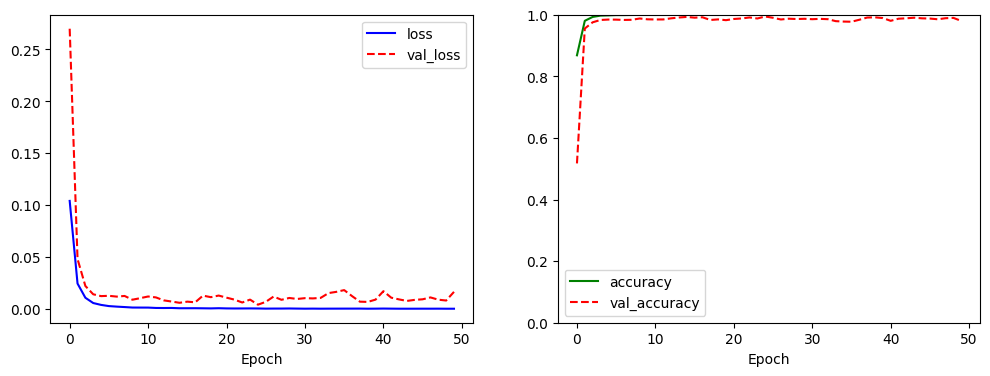

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

268/268 [==============================] - 1s 5ms/step - loss: 0.0469 - auc: 0.9831 - accuracy: 0.9421
loss and accuracy :  [0.04685564339160919, 0.9831058979034424, 0.9420831203460693]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

268/268 [==============================] - 1s 3ms/step


AUC: 0.9422
정확도: 0.9421
F1 스코어: 0.9419


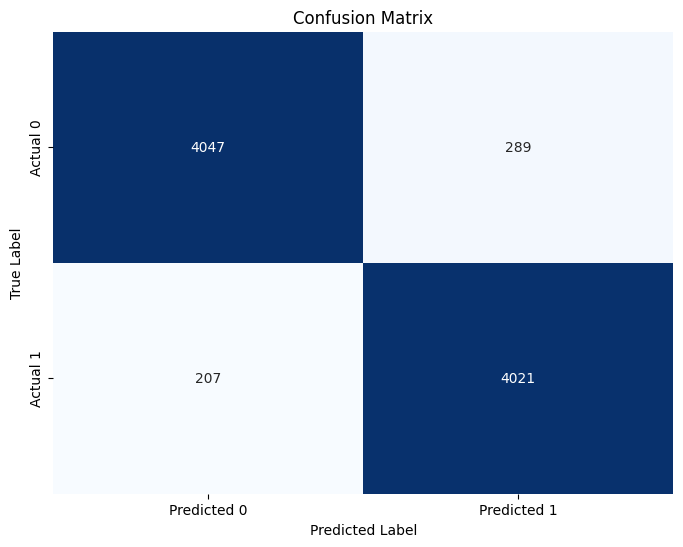

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 모델3

In [ ]:
# 신경망 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(32, input_dim=129, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 32)                4160      
                                                                 
 batch_normalization_35 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_32 (Dropout)        (None, 32)                0         
                                                                 
 dense_55 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_36 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dropout_33 (Dropout)        (None, 16)              

In [ ]:
# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
137/137 [==============================] - 4s 10ms/step - loss: 0.3573 - auc: 0.9491 - accuracy: 0.8550 - val_loss: 1.1449 - val_auc: 0.0000e+00 - val_accuracy: 0.4252
Epoch 2/50
137/137 [==============================] - 1s 8ms/step - loss: 0.1051 - auc: 0.9976 - accuracy: 0.9799 - val_loss: 0.2520 - val_auc: 0.0000e+00 - val_accuracy: 0.8868
Epoch 3/50
137/137 [==============================] - 1s 7ms/step - loss: 0.0450 - auc: 0.9996 - accuracy: 0.9936 - val_loss: 0.1026 - val_auc: 0.0000e+00 - val_accuracy: 0.9630
Epoch 4/50
137/137 [==============================] - 1s 7ms/step - loss: 0.0245 - auc: 0.9999 - accuracy: 0.9965 - val_loss: 0.0831 - val_auc: 0.0000e+00 - val_accuracy: 0.9650
Epoch 5/50
137/137 [==============================] - 1s 7ms/step - loss: 0.0155 - auc: 0.9999 - accuracy: 0.9979 - val_loss: 0.0674 - val_auc: 0.0000e+00 - val_accuracy: 0.9720
Epoch 6/50
137/137 [==============================] - 1s 9ms/step - loss: 0.0102 - auc: 1.0000 - accuracy: 0.

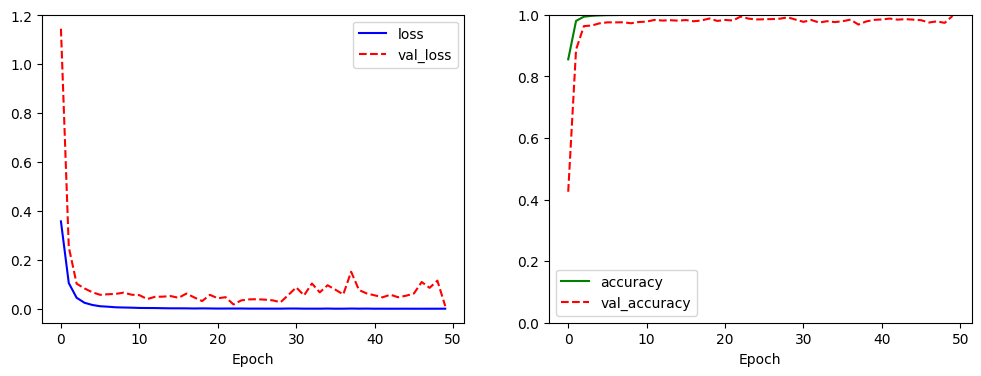

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

268/268 [==============================] - 1s 3ms/step - loss: 0.4696 - auc: 0.9557 - accuracy: 0.9152
loss and accuracy :  [0.469562828540802, 0.9556501507759094, 0.9152265191078186]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

268/268 [==============================] - 1s 2ms/step


AUC: 0.9149
정확도: 0.9152
F1 스코어: 0.9118


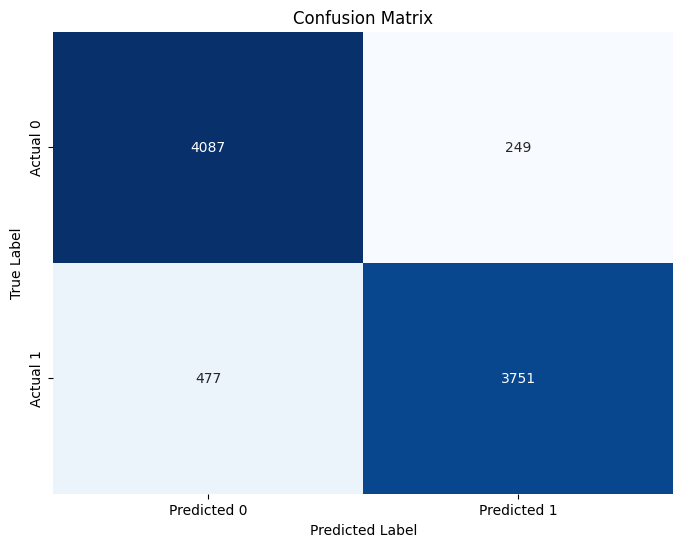

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 모델4

In [ ]:
# 신경망 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(64, input_dim=129, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 64)                8320      
                                                                 
 batch_normalization_41 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_42 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_39 (Dropout)        (None, 32)              

In [ ]:
%%time

# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
137/137 [==============================] - 4s 13ms/step - loss: 0.0026 - auc: 1.0000 - accuracy: 0.9985 - val_loss: 0.4912 - val_auc: 0.0000e+00 - val_accuracy: 0.9691
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 0.0023 - auc: 1.0000 - accuracy: 0.9983 - val_loss: 0.3783 - val_auc: 0.0000e+00 - val_accuracy: 0.9784
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.0027 - auc: 1.0000 - accuracy: 0.9986 - val_loss: 0.7445 - val_auc: 0.0000e+00 - val_accuracy: 0.9646
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.0028 - auc: 1.0000 - accuracy: 0.9983 - val_loss: 0.6864 - val_auc: 0.0000e+00 - val_accuracy: 0.9664
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.0025 - auc: 1.0000 - accuracy: 0.9985 - val_loss: 0.7218 - val_auc: 0.0000e+00 - val_accuracy: 0.9641
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.0027 - auc: 1.0000 - accuracy: 0

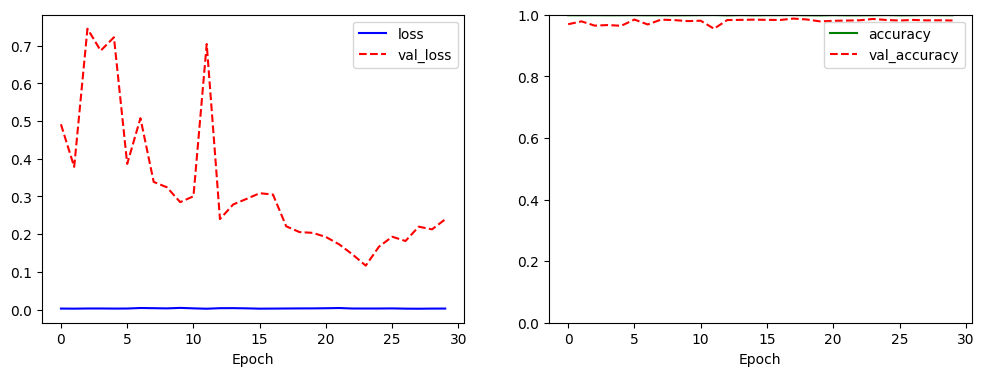

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

268/268 [==============================] - 1s 3ms/step - loss: 0.7084 - auc: 0.9649 - accuracy: 0.9531
loss and accuracy :  [0.7083737850189209, 0.9649091958999634, 0.9530593156814575]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

268/268 [==============================] - 1s 3ms/step


AUC: 0.9533
정확도: 0.9531
F1 스코어: 0.9535


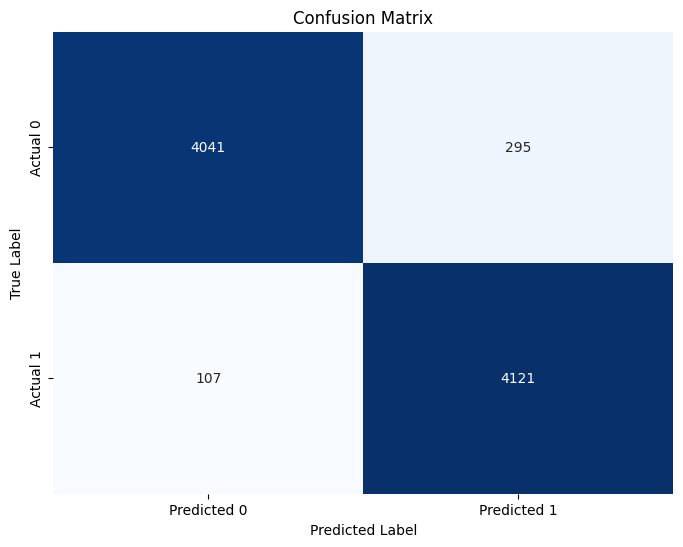

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save_weights('./model_weights1.h5')

In [ ]:
model.load_weights('model_weights1.h5')

In [ ]:
# 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(64, input_dim=129, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','accuracy'])

# 모델 로드
model.load_weights('model_weights1.h5')

# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

268/268 [==============================] - 1s 3ms/step


AUC: 0.9533
정확도: 0.9531
F1 스코어: 0.9535


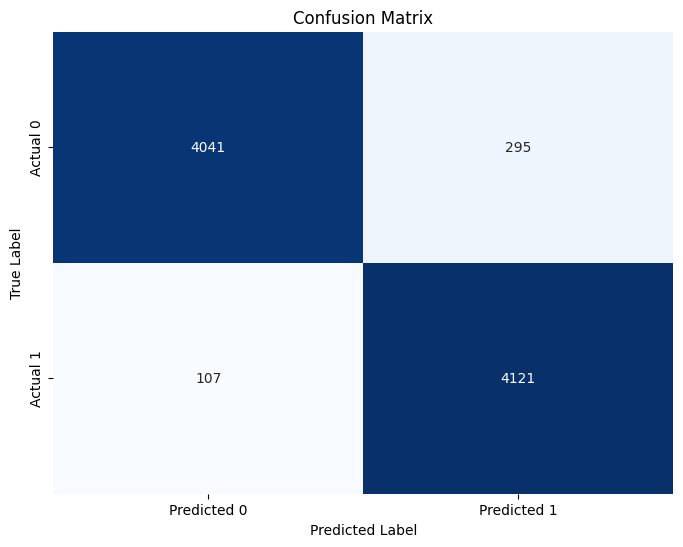

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 전이학습

In [ ]:
# 모델 생성
base_model = Sequential()

# 입력층과 은닉층 추가
base_model.add(Dense(64, input_dim=129, activation='relu'))
base_model.add(BatchNormalization())
base_model.add(Dropout(0.5))
base_model.add(Dense(32, activation='relu'))
base_model.add(BatchNormalization())
base_model.add(Dropout(0.5))
base_model.add(Dense(16, activation='relu'))
base_model.add(Dropout(0.5))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
base_model.add(Dense(1, activation='sigmoid'))



# 모델 로드
base_model.load_weights('model_weights1.h5')

# 기존 모델의 일부 레이어 동결
for layer in base_model.layers:
    layer.trainable = False

# 새로운 데이터셋에 대한 출력 레이어 추가
model = Sequential()
model.add(base_model)
model.add(Dense(8, activation='leaky_relu'))  # 추가한 출력 레이어
model.add(BatchNormalization())
model.add(Dense(4, activation='leaky_relu'))  # 추가한 출력 레이어
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='leaky_relu'))  # 추가한 출력 레이어
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))  # 최종 출력 레이어

# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='mse', optimizer='adam', metrics=['AUC','accuracy'])

# 전체 모델 훈련
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 10s 18ms/step - loss: 0.1320 - auc: 0.8987 - accuracy: 0.8077 - val_loss: 0.0552 - val_auc: 0.0000e+00 - val_accuracy: 0.9992
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 0.0319 - auc: 0.9914 - accuracy: 0.9881 - val_loss: 0.0139 - val_auc: 0.0000e+00 - val_accuracy: 0.9992
Epoch 3/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0205 - auc: 0.9917 - accuracy: 0.9890 - val_loss: 0.0096 - val_auc: 0.0000e+00 - val_accuracy: 0.9992
Epoch 4/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0161 - auc: 0.9913 - accuracy: 0.9883 - val_loss: 0.0059 - val_auc: 0.0000e+00 - val_accuracy: 0.9992
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 0.0129 - auc: 0.9919 - accuracy: 0.9900 - val_loss: 0.0025 - val_auc: 0.0000e+00 - val_accuracy: 0.9992
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0109 - auc: 0.9929 - accuracy:

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

268/268 [==============================] - 1s 5ms/step - loss: 0.0445 - auc: 0.9622 - accuracy: 0.9540
loss and accuracy :  [0.04454150050878525, 0.9621722102165222, 0.9539934396743774]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

268/268 [==============================] - 1s 2ms/step


AUC: 0.9542
정확도: 0.9540
F1 스코어: 0.9542


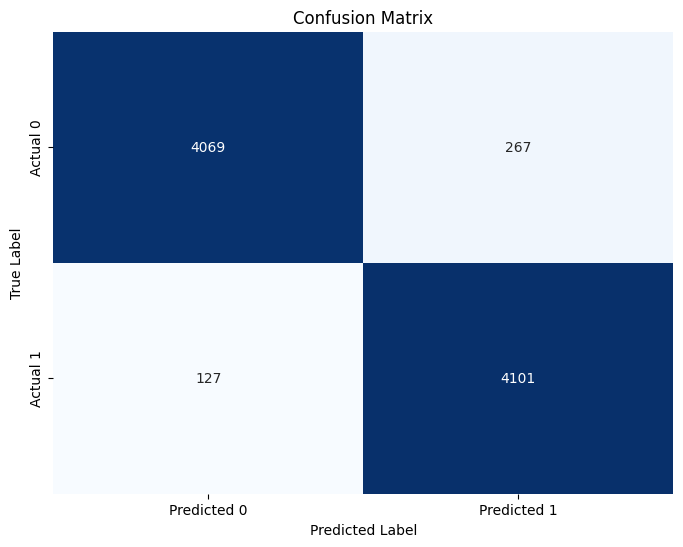

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 모델 5(최적)

In [ ]:
# 신경망 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(64, input_dim=129, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dropout(0.5))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 64)                8320      
                                                                 
 batch_normalization_96 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_93 (Dropout)        (None, 64)                0         
                                                                 
 dense_163 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_97 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_94 (Dropout)        (None, 32)              

In [ ]:
%%time

# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
137/137 [==============================] - 4s 10ms/step - loss: 6.8508e-05 - auc: 1.0000 - accuracy: 1.0000 - val_loss: 0.1246 - val_auc: 0.0000e+00 - val_accuracy: 0.9900
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 3.9858e-04 - auc: 1.0000 - accuracy: 0.9999 - val_loss: 0.1202 - val_auc: 0.0000e+00 - val_accuracy: 0.9925
Epoch 3/30
137/137 [==============================] - 2s 12ms/step - loss: 5.4037e-04 - auc: 1.0000 - accuracy: 0.9999 - val_loss: 0.0670 - val_auc: 0.0000e+00 - val_accuracy: 0.9971
Epoch 4/30
137/137 [==============================] - 1s 11ms/step - loss: 1.2138e-05 - auc: 1.0000 - accuracy: 1.0000 - val_loss: 0.1469 - val_auc: 0.0000e+00 - val_accuracy: 0.9907
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 9.7927e-05 - auc: 1.0000 - accuracy: 1.0000 - val_loss: 0.1852 - val_auc: 0.0000e+00 - val_accuracy: 0.9907
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0196e-05 -

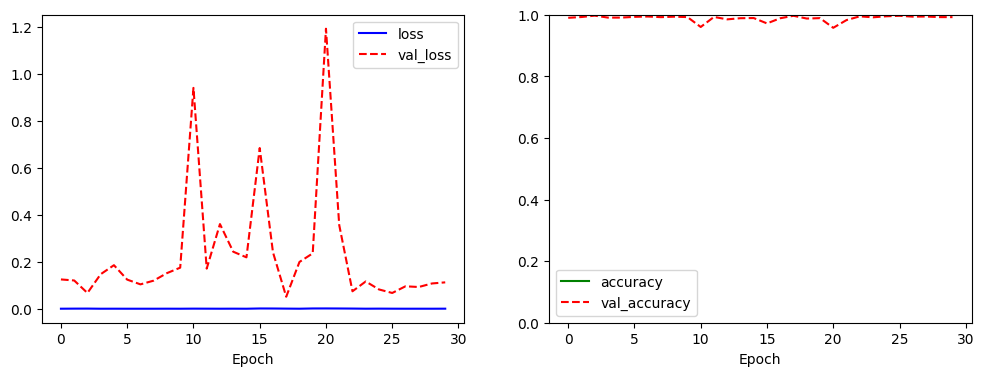

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

268/268 [==============================] - 1s 3ms/step - loss: 0.3325 - auc: 0.9847 - accuracy: 0.9762
loss and accuracy :  [0.3325258493423462, 0.9846977591514587, 0.9761793613433838]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

268/268 [==============================] - 1s 2ms/step


AUC: 0.9763
정확도: 0.9762
F1 스코어: 0.9761


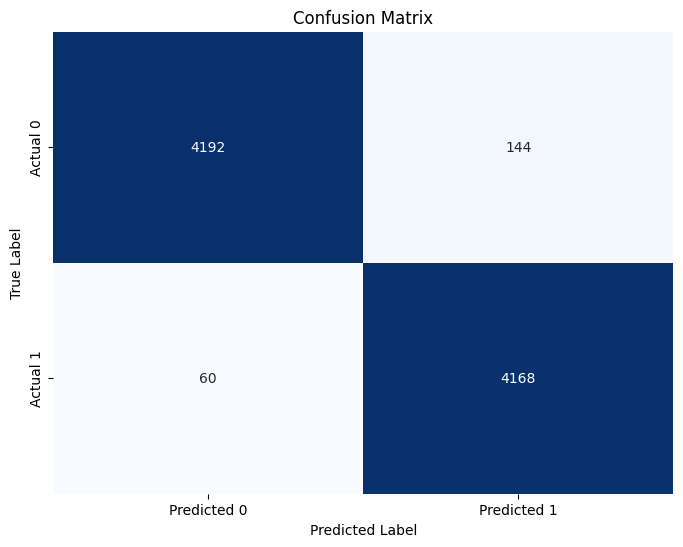

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save_weights('./model_weights_best.h5')

In [ ]:
model.load_weights('model_weights_best.h5')

# 중복 데이터 25% 비교

In [ ]:
df_fft_train = pd.read_csv('/content/train_25_fft.csv')
df_fft_test = pd.read_csv('/content/test_25_fft.csv')

In [ ]:
X_train = df_fft_train.drop('target', axis = 1)
y_train = df_fft_train['target']
X_test = df_fft_test.drop('target', axis = 1)
y_test = df_fft_test['target']

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (31295, 129)
y_train:  (31295,)
X_test:  (10705, 129)
y_test:  (10705,)


In [ ]:
# 신경망 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(64, input_dim=129, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dropout(0.5))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 64)                8320      
                                                                 
 batch_normalization_98 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_96 (Dropout)        (None, 64)                0         
                                                                 
 dense_167 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_99 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_97 (Dropout)        (None, 32)              

In [ ]:
%%time
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)


# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.3, callbacks=[early_stop])

Epoch 1/30
172/172 [==============================] - 4s 9ms/step - loss: 4.5845e-04 - auc: 1.0000 - accuracy: 0.9999 - val_loss: 0.1434 - val_auc: 0.0000e+00 - val_accuracy: 0.9913
Epoch 2/30
172/172 [==============================] - 1s 7ms/step - loss: 5.8519e-04 - auc: 1.0000 - accuracy: 0.9998 - val_loss: 0.1470 - val_auc: 0.0000e+00 - val_accuracy: 0.9922
Epoch 3/30
172/172 [==============================] - 1s 8ms/step - loss: 3.0025e-04 - auc: 1.0000 - accuracy: 0.9999 - val_loss: 0.3138 - val_auc: 0.0000e+00 - val_accuracy: 0.9750
Epoch 4/30
172/172 [==============================] - 1s 8ms/step - loss: 0.0016 - auc: 0.9998 - accuracy: 0.9999 - val_loss: 0.5060 - val_auc: 0.0000e+00 - val_accuracy: 0.9685
Epoch 5/30
172/172 [==============================] - 1s 7ms/step - loss: 0.0014 - auc: 1.0000 - accuracy: 0.9995 - val_loss: 0.2691 - val_auc: 0.0000e+00 - val_accuracy: 0.9891
Epoch 6/30
172/172 [==============================] - 1s 7ms/step - loss: 4.0899e-04 - auc: 1.0000

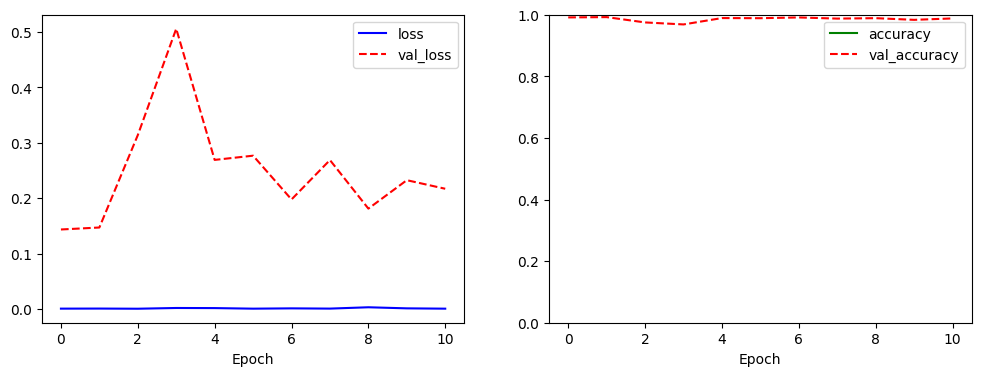

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

335/335 [==============================] - 2s 5ms/step - loss: 1.2319 - auc: 0.9040 - accuracy: 0.8760
loss and accuracy :  [1.2319177389144897, 0.9040408134460449, 0.8760392069816589]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

335/335 [==============================] - 1s 3ms/step


AUC: 0.8754
정확도: 0.8760
F1 스코어: 0.8674


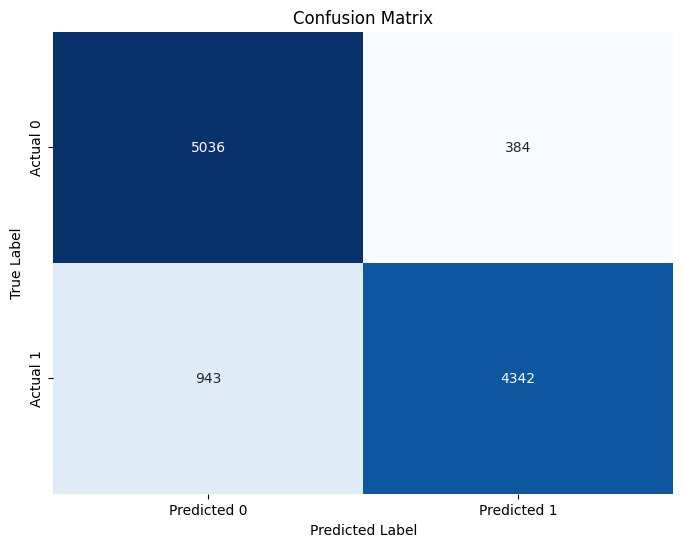

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 중복 데이터 50% 비교

In [ ]:
df_fft_train = pd.read_csv('/content/train_50_fft.csv')
df_fft_test = pd.read_csv('/content/test_50_fft.csv')

In [ ]:
X_train = df_fft_train.drop('target', axis = 1)
y_train = df_fft_train['target']
X_test = df_fft_test.drop('target', axis = 1)
y_test = df_fft_test['target']

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (43813, 129)
y_train:  (43813,)
X_test:  (14987, 129)
y_test:  (14987,)


In [ ]:
# 신경망 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(64, input_dim=129, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dropout(0.5))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 64)                8320      
                                                                 
 batch_normalization_100 (B  (None, 64)                256       
 atchNormalization)                                              
                                                                 
 dropout_99 (Dropout)        (None, 64)                0         
                                                                 
 dense_171 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_101 (B  (None, 32)                128       
 atchNormalization)                                              
                                                                 
 dropout_100 (Dropout)       (None, 32)              

In [ ]:
%%time
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)


# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.3, callbacks=[early_stop])

Epoch 1/30
240/240 [==============================] - 6s 9ms/step - loss: 4.0688e-04 - auc: 1.0000 - accuracy: 0.9998 - val_loss: 0.0860 - val_auc: 0.0000e+00 - val_accuracy: 0.9944
Epoch 2/30
240/240 [==============================] - 2s 8ms/step - loss: 5.6821e-04 - auc: 1.0000 - accuracy: 0.9998 - val_loss: 0.4773 - val_auc: 0.0000e+00 - val_accuracy: 0.9656
Epoch 3/30
240/240 [==============================] - 2s 7ms/step - loss: 4.2146e-04 - auc: 1.0000 - accuracy: 0.9999 - val_loss: 0.1821 - val_auc: 0.0000e+00 - val_accuracy: 0.9889
Epoch 4/30
240/240 [==============================] - 2s 10ms/step - loss: 7.0678e-04 - auc: 0.9999 - accuracy: 0.9998 - val_loss: 0.3057 - val_auc: 0.0000e+00 - val_accuracy: 0.9820
Epoch 5/30
240/240 [==============================] - 2s 10ms/step - loss: 1.2363e-04 - auc: 1.0000 - accuracy: 1.0000 - val_loss: 0.2348 - val_auc: 0.0000e+00 - val_accuracy: 0.9874
Epoch 6/30
240/240 [==============================] - 2s 7ms/step - loss: 2.6404e-04 - a

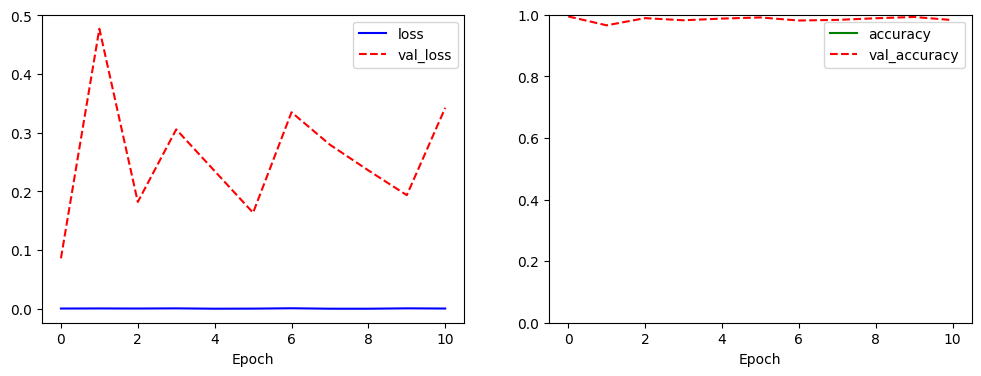

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

469/469 [==============================] - 1s 3ms/step - loss: 0.3477 - auc: 0.9743 - accuracy: 0.9494
loss and accuracy :  [0.34773874282836914, 0.9742968082427979, 0.9493560791015625]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

469/469 [==============================] - 1s 2ms/step


AUC: 0.9490
정확도: 0.9494
F1 스코어: 0.9473


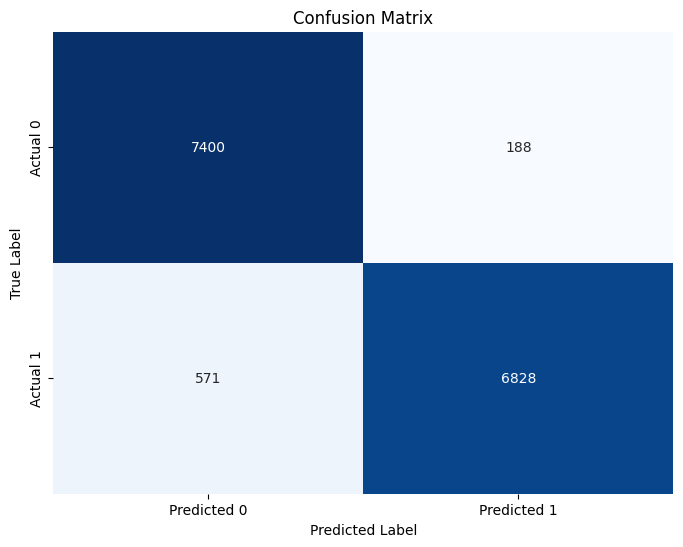

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 로지스틱 회귀

In [ ]:
df_fft_train = pd.read_csv('/content/train_0_fft.csv')
df_fft_test = pd.read_csv('/content/test_0_fft.csv')

In [ ]:
X_train = df_fft_train.drop('target', axis = 1)
y_train = df_fft_train['target']
X_test = df_fft_test.drop('target', axis = 1)
y_test = df_fft_test['target']

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (25036, 129)
y_train:  (25036,)
X_test:  (8564, 129)
y_test:  (8564,)


In [ ]:
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)


auc = roc_auc_score(y_test, y_pred)
print('AUC Score: ', auc)

AUC Score:  0.9814345018450185


# 모델 5(최적re)

In [ ]:
# 랜덤 시드 고정
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# 신경망 모델 생성
model = Sequential()

# 입력층과 은닉층 추가
model.add(Dense(64, input_dim=129, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dropout(0.5))

# 출력층 추가 (이진 분류의 경우 1개의 뉴런과 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                8320      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_5 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 32)               

In [ ]:
%%time

# 모델 컴파일 (이진 분류 문제이므로 binary_crossentropy를 손실 함수로 사용)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
137/137 [==============================] - 4s 13ms/step - loss: 0.5609 - auc: 0.8545 - accuracy: 0.7460 - val_loss: 0.8792 - val_auc: 0.0000e+00 - val_accuracy: 0.5861
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 0.1229 - auc: 0.9939 - accuracy: 0.9649 - val_loss: 0.1919 - val_auc: 0.0000e+00 - val_accuracy: 0.9449
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 0.0503 - auc: 0.9988 - accuracy: 0.9895 - val_loss: 0.1164 - val_auc: 0.0000e+00 - val_accuracy: 0.9585
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.0282 - auc: 0.9996 - accuracy: 0.9945 - val_loss: 0.0807 - val_auc: 0.0000e+00 - val_accuracy: 0.9680
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.0162 - auc: 0.9999 - accuracy: 0.9974 - val_loss: 0.0753 - val_auc: 0.0000e+00 - val_accuracy: 0.9742
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.0134 - auc: 1.0000 - accuracy: 0.

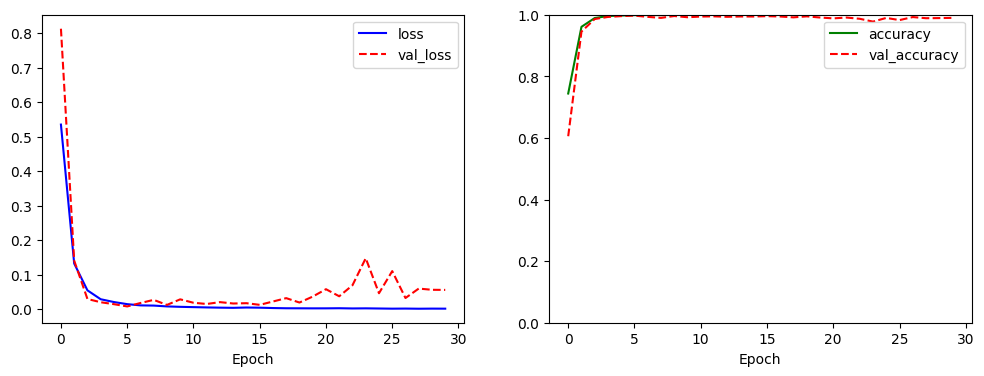

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 테스트 결과 확인
result = model.evaluate(X_test, y_test)
print('loss and accuracy : ', result)

268/268 [==============================] - 1s 4ms/step - loss: 0.4413 - auc: 0.9605 - accuracy: 0.9256
loss and accuracy :  [0.4413369596004486, 0.9605094790458679, 0.9256188869476318]


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

268/268 [==============================] - 1s 3ms/step


AUC: 0.9254
정확도: 0.9256
F1 스코어: 0.9236


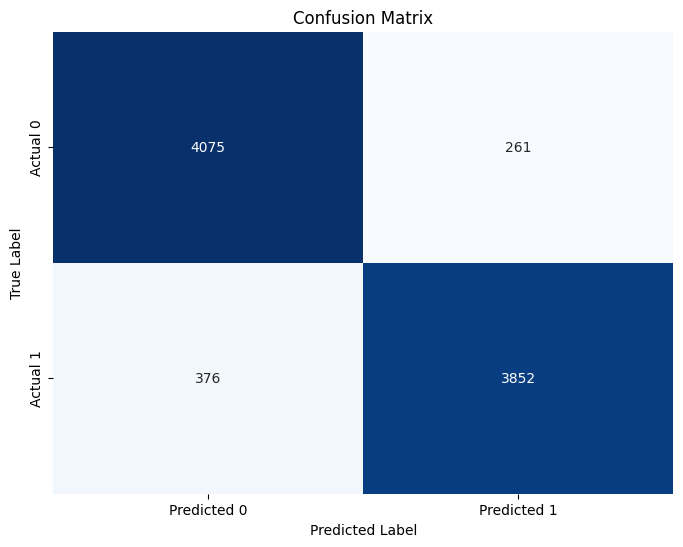

In [ ]:
# AUC 계산
auc_score = roc_auc_score(y_test, y_pred)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

# 오차 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC 및 정확도, F1 스코어 출력
print(f'AUC: {auc_score:.4f}')
print(f'정확도: {accuracy:.4f}')
print(f'F1 스코어: {f1:.4f}')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save_weights('./model_weights_best.h5')

In [ ]:
model.load_weights('model_weights_best.h5')